In [247]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [248]:
#house_prices_advanced_regression_techniques_path = kagglehub.competition_download('house-prices-advanced-regression-techniques')
#/kaggle/input/house-prices-advanced-regression-techniques/test.csv
#/kaggle/input/house-prices-advanced-regression-techniques/train.csv

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [250]:
train_data = pd.read_csv(open('/kaggle/input/house-prices-advanced-regression-techniques/train.csv'),encoding='utf-8')
test_data = pd.read_csv(open('/kaggle/input/house-prices-advanced-regression-techniques/test.csv'),encoding='utf-8')
train_data.drop(['Id'],axis=1,inplace=True)
test_data.drop(['Id'],axis=1,inplace=True)
data = pd.concat((train_data,test_data),axis=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [251]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [252]:
data['MSSubClass'] = data['MSSubClass'].astype(object)
data['YrSold'] = data['YrSold'].astype(object)
data['MoSold'] = data['MoSold'].astype(object)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

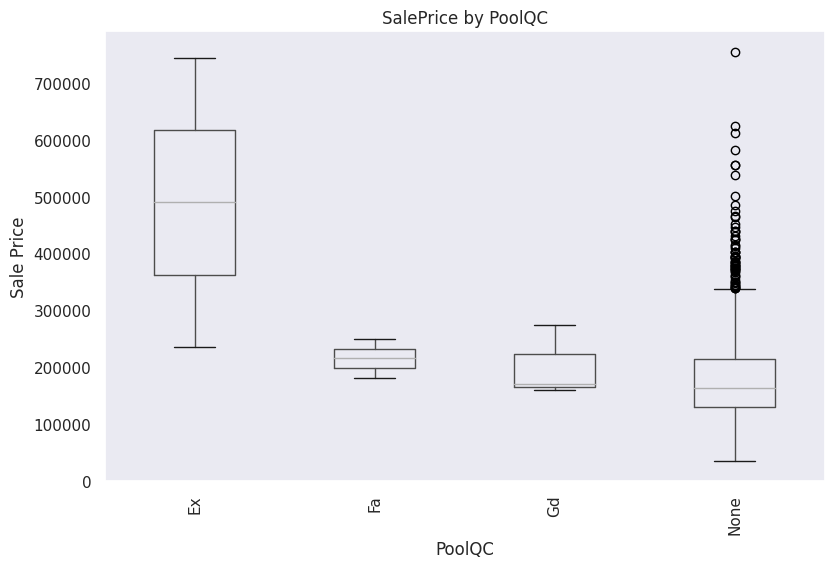

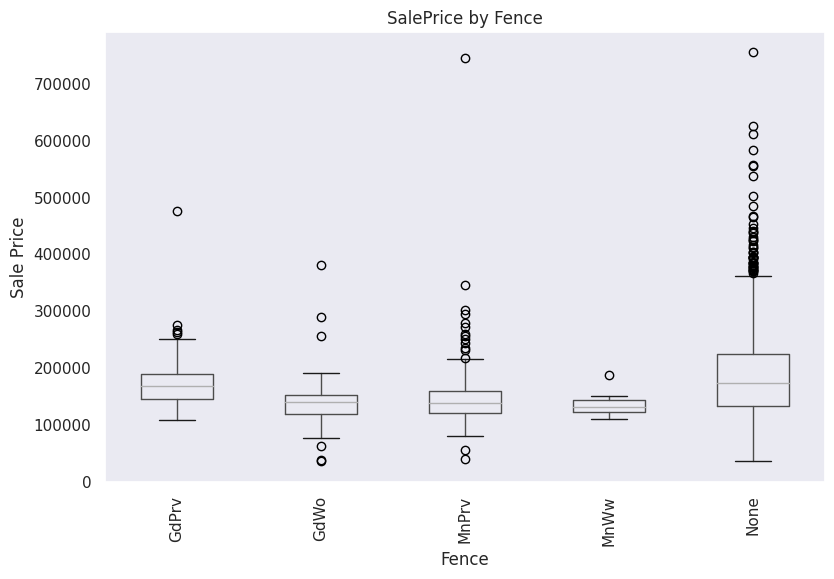

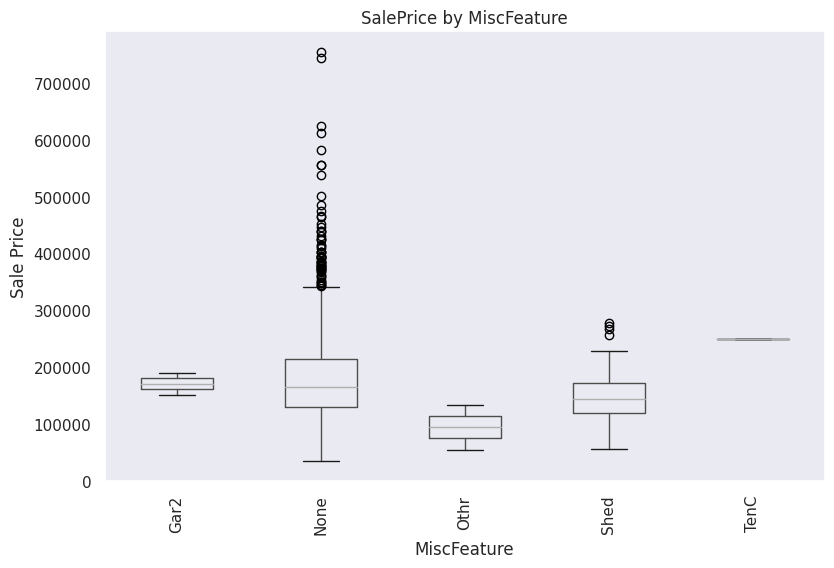

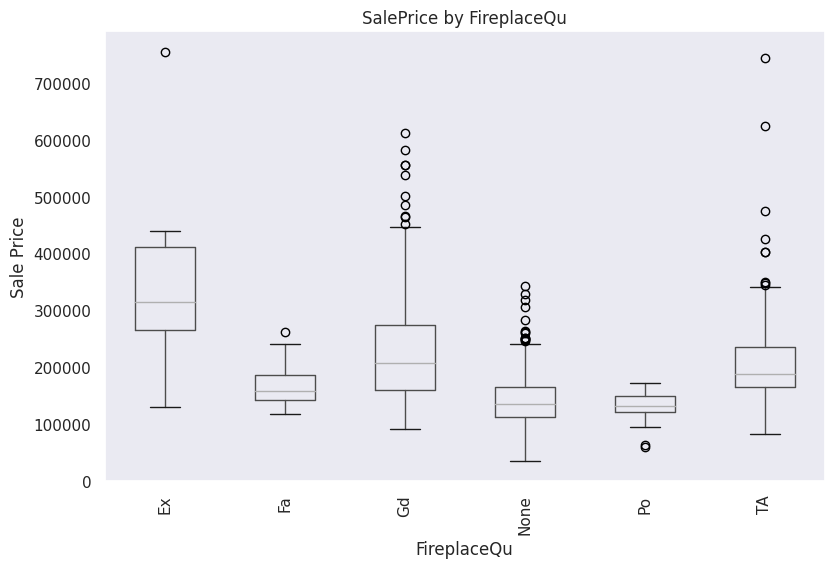

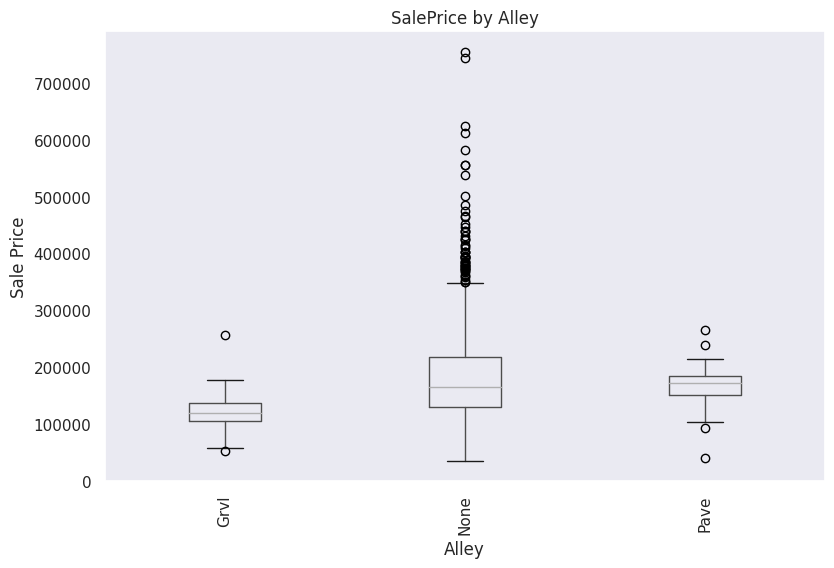

In [253]:
for col in ['PoolQC','Fence','MiscFeature','FireplaceQu','Alley']:
    train_data[col] = train_data[col].fillna('None')
for index in ['PoolQC','Fence','MiscFeature','FireplaceQu','Alley']:
    df = train_data[[index,'SalePrice']]
    df.boxplot(column='SalePrice', by=index, grid=False)
    plt.title('SalePrice by '+index)
    plt.suptitle('')
    plt.xlabel(index)
    plt.ylabel('Sale Price')

    plt.xticks(rotation=90)
    plt.show()

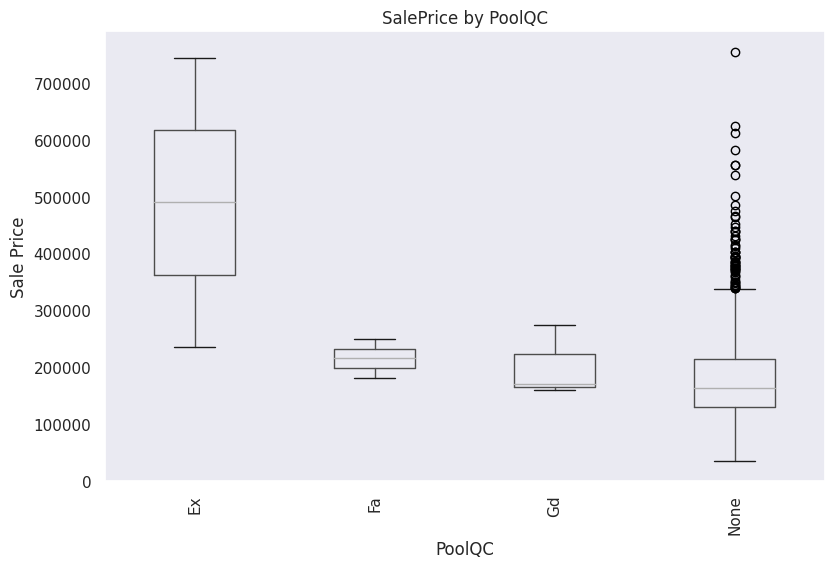

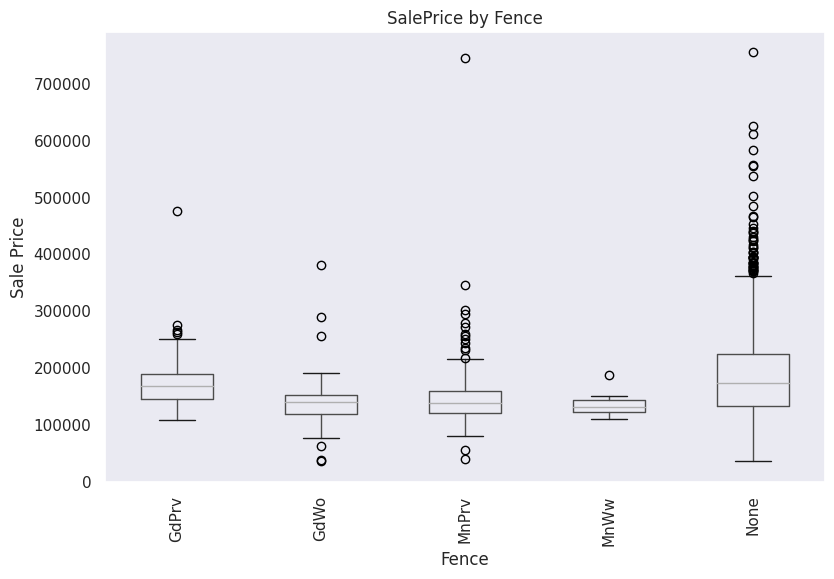

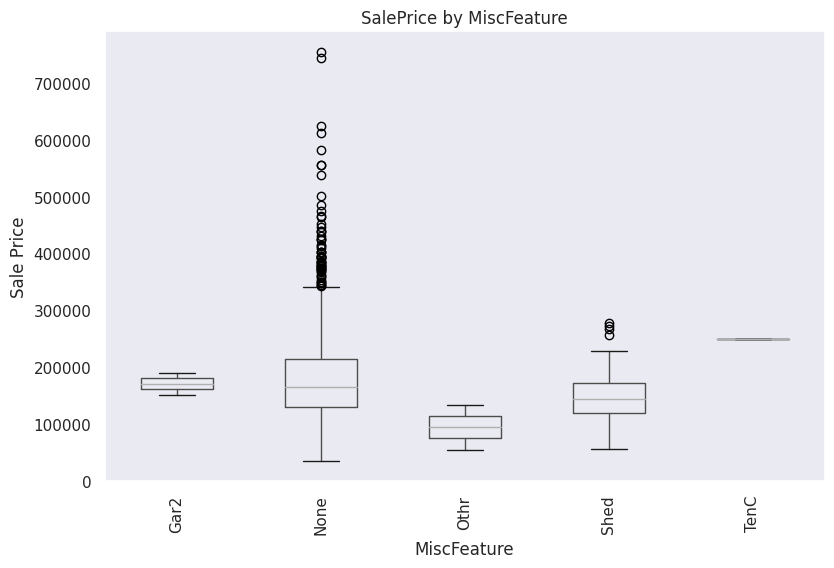

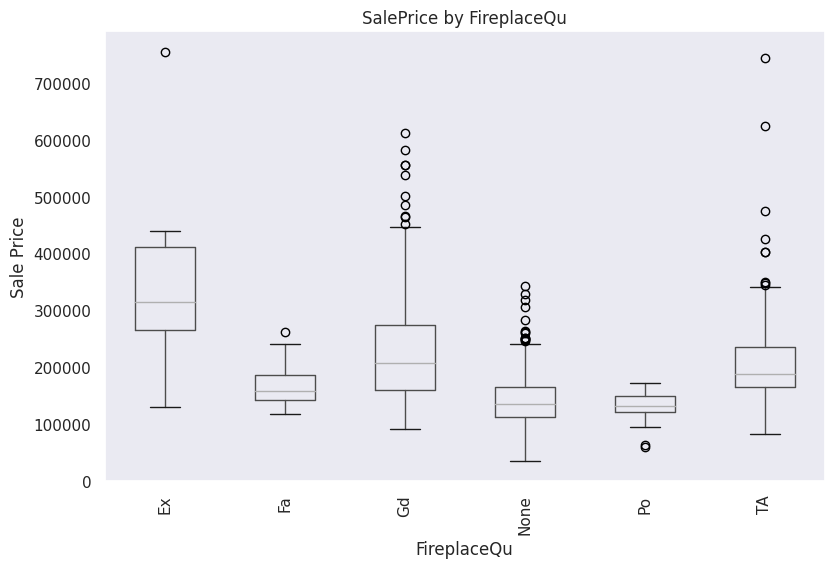

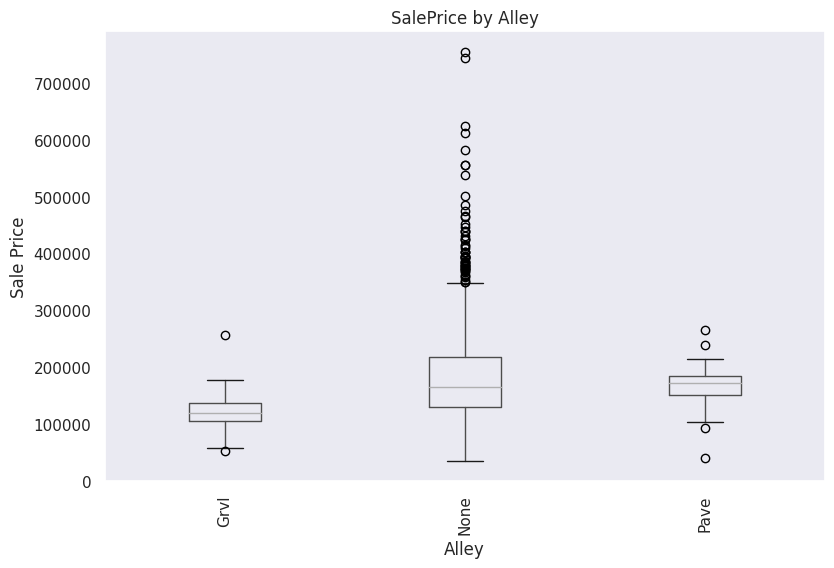

In [254]:
for col in ['PoolQC','Fence','MiscFeature','FireplaceQu','Alley']:
    train_data[col] = train_data[col].fillna('None')
for index in ['PoolQC','Fence','MiscFeature','FireplaceQu','Alley']:
    df = train_data[[index,'SalePrice']]
    df.boxplot(column='SalePrice', by=index, grid=False)
    plt.title('SalePrice by '+index)
    plt.suptitle('')
    plt.xlabel(index)
    plt.ylabel('Sale Price')

    plt.xticks(rotation=90)
    plt.show()

In [255]:
# 去掉数据过少的因子
data = data.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis=1)
continue_data_index = data.dtypes[data.dtypes != "object"].index
discrete_data_index = data.dtypes[data.dtypes == "object"].index

PoolQC ANOVA F-statistic: 10.509852607071148
PoolQC ANOVA p-value: 7.7009894157147e-07
Fence ANOVA F-statistic: 13.433275547560223
Fence ANOVA p-value: 9.379976594788224e-11
MiscFeature ANOVA F-statistic: 2.593622339924057
MiscFeature ANOVA p-value: 0.0350036718754261
FireplaceQu ANOVA F-statistic: 121.07512126691806
FireplaceQu ANOVA p-value: 2.9712169727633336e-107
Alley ANOVA F-statistic: 15.176613889987992
Alley ANOVA p-value: 2.9963796805460783e-07


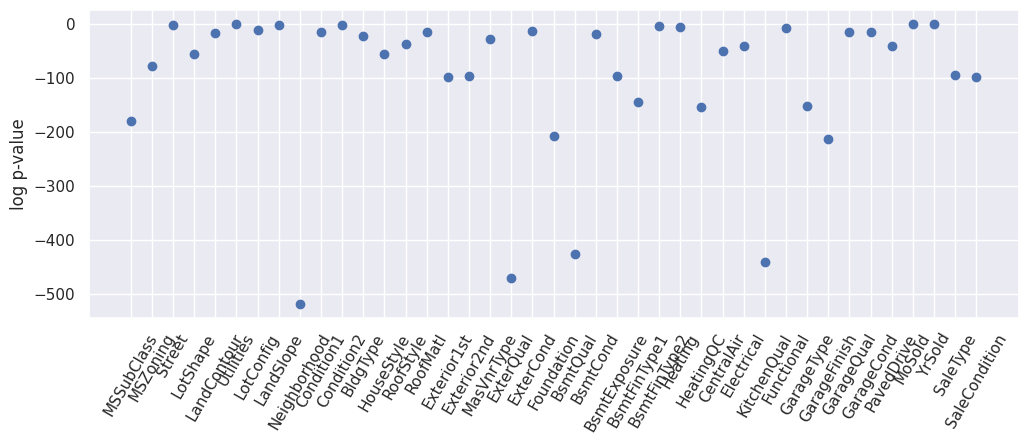

Index(['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish',
       'Foundation'],
      dtype='object')


In [256]:
for index in ['PoolQC','Fence','MiscFeature','FireplaceQu','Alley']:
    df = train_data[[index,'SalePrice']]
    df_poolqc = df.dropna(subset=[index])

    groups = [df_poolqc[df_poolqc[index] == category]['SalePrice'] for category in df_poolqc[index].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{index} ANOVA F-statistic: {f_stat}")
    print(f"{index} ANOVA p-value: {p_value}")
p_result={}
for index in discrete_data_index:
    df = train_data[[index,'SalePrice']]
    df_poolqc = df.dropna(subset=[index])

    groups = [df_poolqc[df_poolqc[index] == category]['SalePrice'] for category in df_poolqc[index].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    p_result[index] = p_value
p_result=pd.DataFrame(p_result,index=['value']).T
plt.figure(figsize=(12,4))
plt.scatter(p_result.index,np.log(p_result))
plt.xticks(rotation=60)
plt.ylabel('log p-value')
plt.show()
chosed_discrete_index = p_result.sort_values(by='value').index[:6]
print(chosed_discrete_index)

In [257]:
# 连续型数据空值处理
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].median())
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean())
data['BsmtFullBath']=data['BsmtFullBath'].fillna(data['BsmtFullBath'].mean())


# 离散型数据空值填充
data['Functional'] = data['Functional'].fillna('Typ')
data['Utilities'] = data['Utilities'].fillna('ELO')

# 0填充
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
# None填充
for col in ['MasVnrType','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    data[col] = data[col].fillna('None')
# 众数填充
for col in ['Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','MSZoning']:
    data[col] = data[col].fillna(data[col].mode()[0])

train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemodAdd 

# 数据初步描述统计

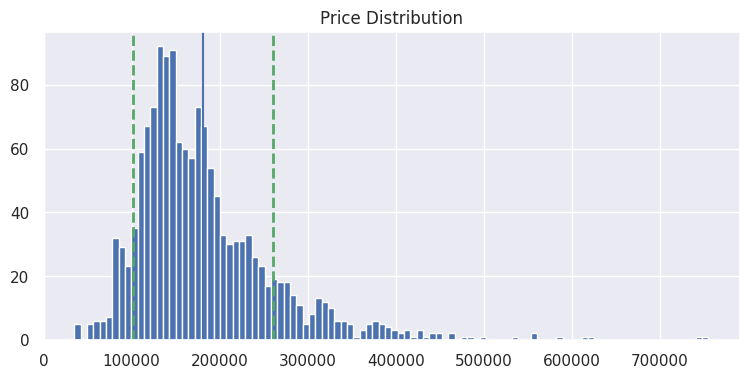

180921.19589041095 79442.50288288662


In [258]:
plt.figure(figsize=(9,4))
plt.title('Price Distribution')
plt.hist(train_data['SalePrice'],bins=100)
plt.axvline(x=train_data['SalePrice'].mean(),c='b')
plt.axvline(x=train_data['SalePrice'].mean()+train_data['SalePrice'].std(),c='g',ls="--",lw=2)
plt.axvline(x=train_data['SalePrice'].mean()-train_data['SalePrice'].std(),c='g',ls="--",lw=2)
plt.show()
print(train_data['SalePrice'].mean(),train_data['SalePrice'].std())

<Figure size 900x400 with 0 Axes>

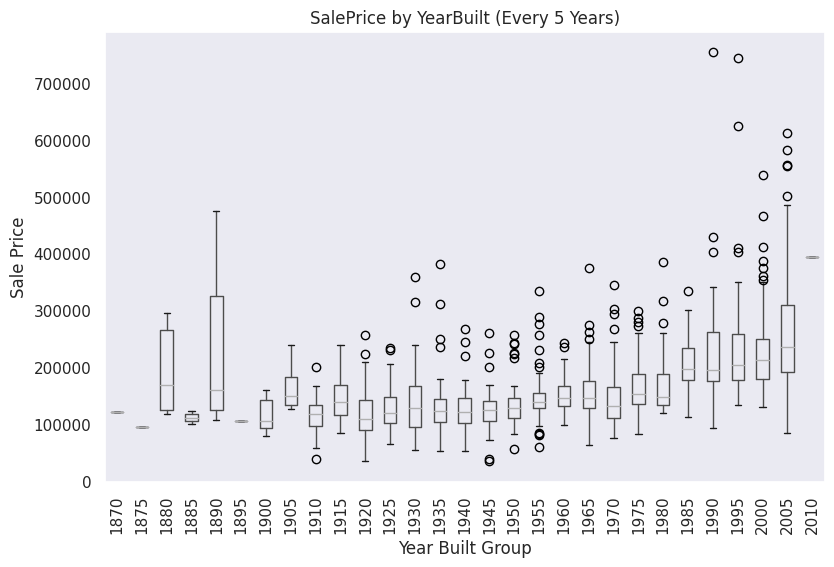

In [259]:
df = train_data[['YearBuilt','SalePrice']].copy()
df['YearBuiltGroup'] = (df['YearBuilt'] // 5) * 5
plt.figure(figsize=(9, 4))
df.boxplot(column='SalePrice', by='YearBuiltGroup', grid=False)
plt.title('SalePrice by YearBuilt (Every 5 Years)')
plt.suptitle('')
plt.xlabel('Year Built Group')
plt.ylabel('Sale Price')

plt.xticks(rotation=90)
plt.show()

<Figure size 900x400 with 0 Axes>

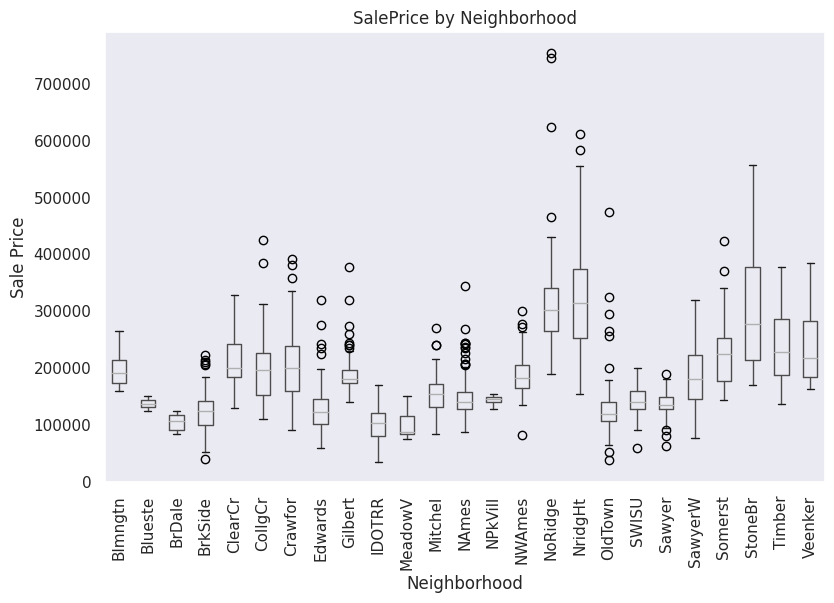

In [260]:
df = train_data[['Neighborhood','SalePrice']]
plt.figure(figsize=(9, 4))
df.boxplot(column='SalePrice', by='Neighborhood', grid=False)
plt.title('SalePrice by Neighborhood')
plt.suptitle('')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')

plt.xticks(rotation=90)
plt.show()

<Figure size 900x400 with 0 Axes>

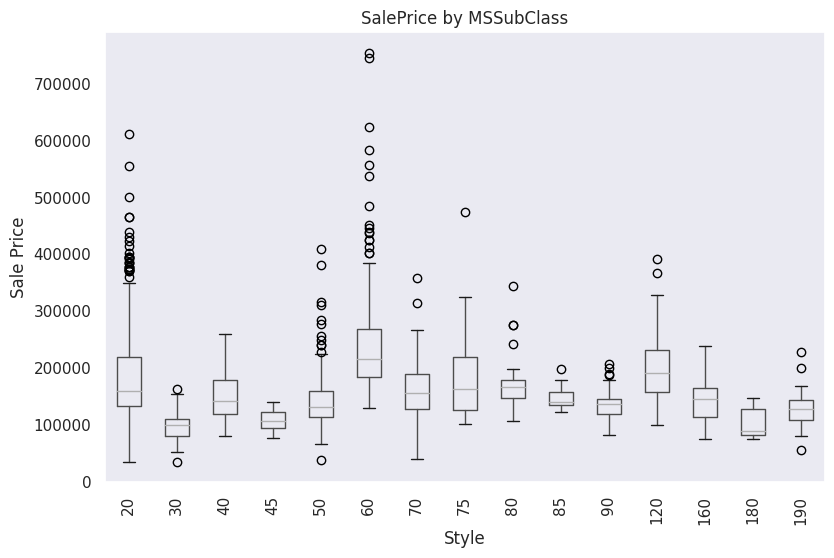

In [261]:
df = train_data[['MSSubClass','SalePrice']]
plt.figure(figsize=(9, 4))
df.boxplot(column='SalePrice', by='MSSubClass', grid=False)
plt.title('SalePrice by MSSubClass')
plt.suptitle('')
plt.xlabel('Style')
plt.ylabel('Sale Price')

plt.xticks(rotation=90)
plt.show()

<Figure size 900x400 with 0 Axes>

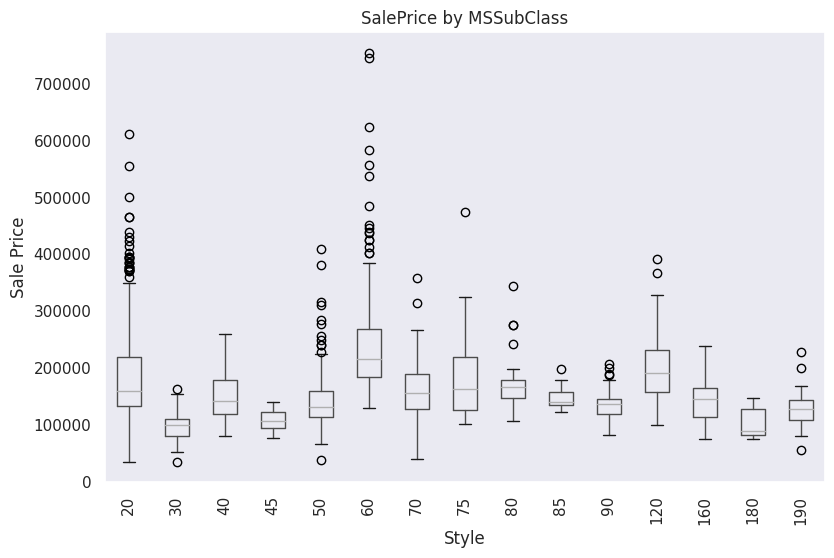

In [262]:
df = train_data[['MSSubClass','SalePrice']]
plt.figure(figsize=(9, 4))
df.boxplot(column='SalePrice', by='MSSubClass', grid=False)
plt.title('SalePrice by MSSubClass')
plt.suptitle('')
plt.xlabel('Style')
plt.ylabel('Sale Price')

plt.xticks(rotation=90)
plt.show()

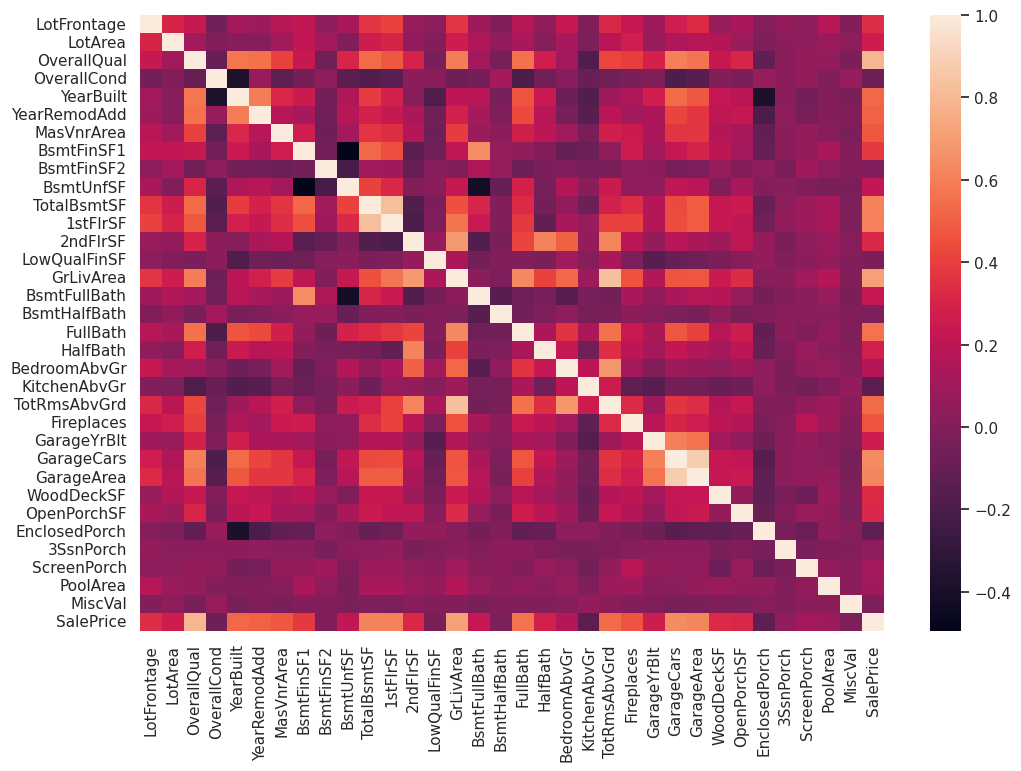

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


In [263]:
sns.set(rc={'figure.figsize':(12,8)})
corrmat = train_data[continue_data_index].corr()
sns.heatmap(data=corrmat)
plt.show()
chosed_continue_index = corrmat.nlargest(11,'SalePrice')['SalePrice'].index
print(chosed_continue_index)

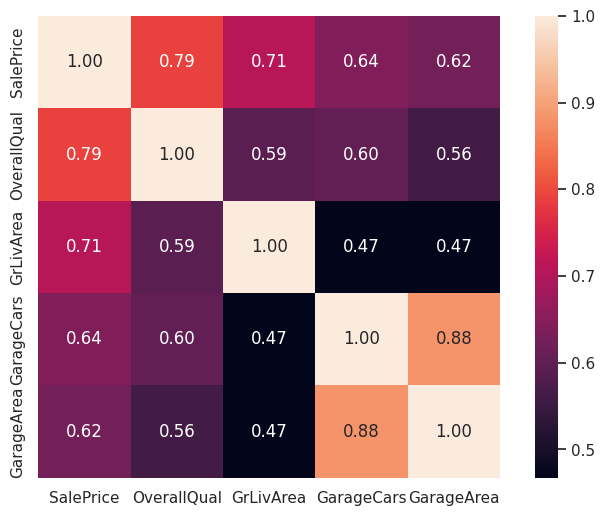

In [264]:
sns.set(rc={'figure.figsize':(9,6)})
corrmat = train_data[indexs].corr()
sns.heatmap(data=corrmat, annot=True, square=True, fmt='.2f')
plt.show()

In [265]:
# 对数变换
for col in ['SalePrice','LotArea','LotFrontage','TotalBsmtSF','1stFlrSF','GrLivArea']:
    data[col] = np.log1p(data[col])
train_data = data.iloc[:len(train_data)]
test_data = data.iloc[len(train_data):]

In [266]:
chosed_continue_index = chosed_continue_index.drop('SalePrice') if 'SalePrice' in chosed_continue_index else chosed_continue_index
chosed_index = chosed_discrete_index.append(chosed_continue_index)
OLS_train_xdata = train_data[chosed_index]
OLS_train_ydata = train_data['SalePrice']
OLS_test_xdata = test_data[chosed_index]

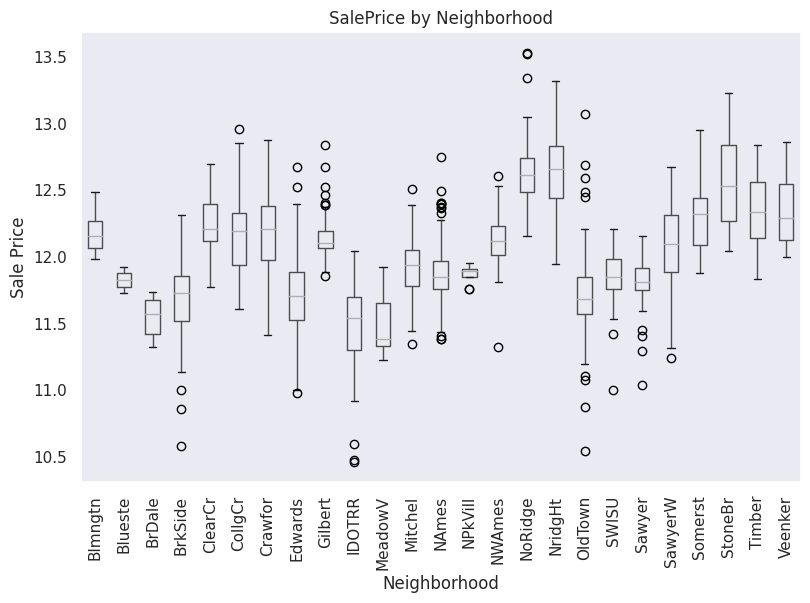

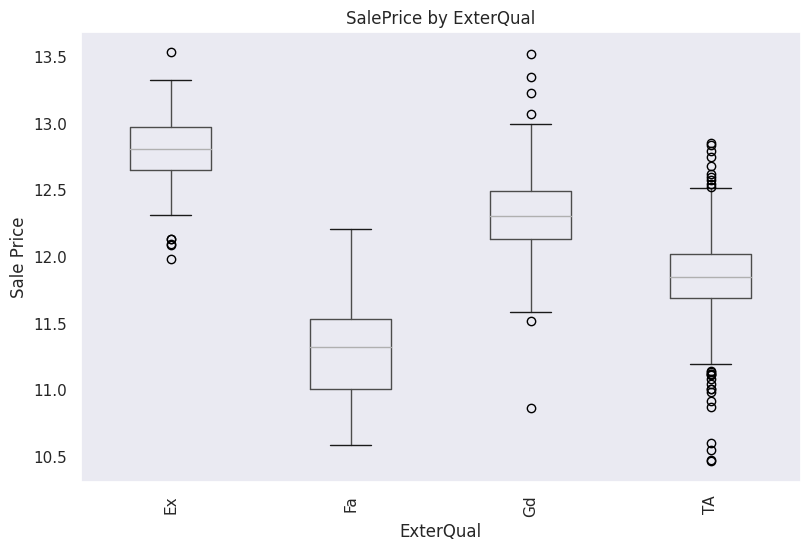

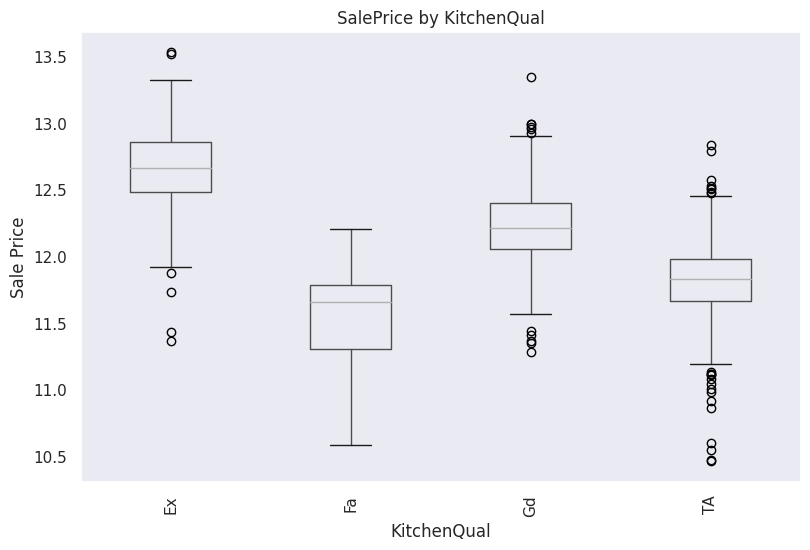

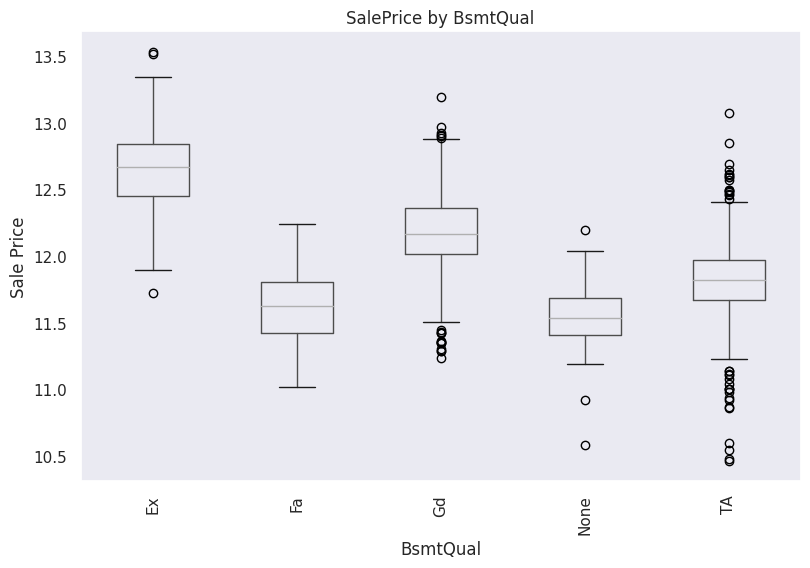

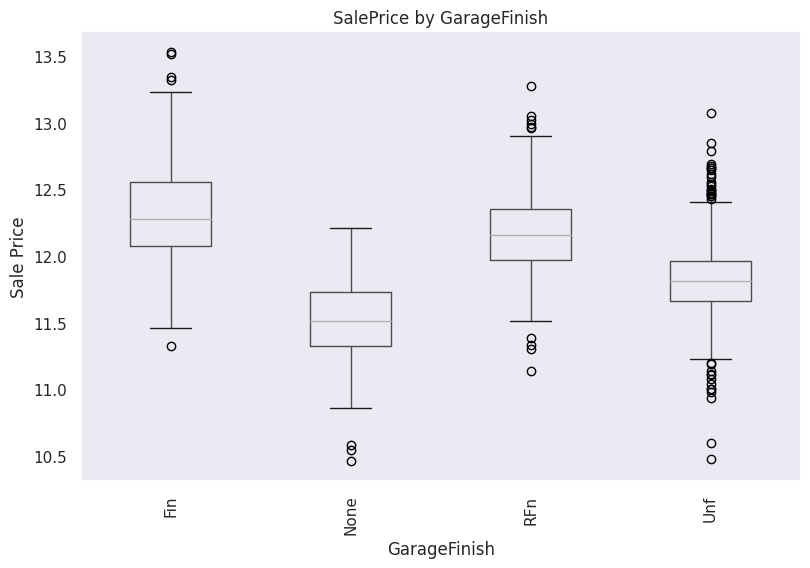

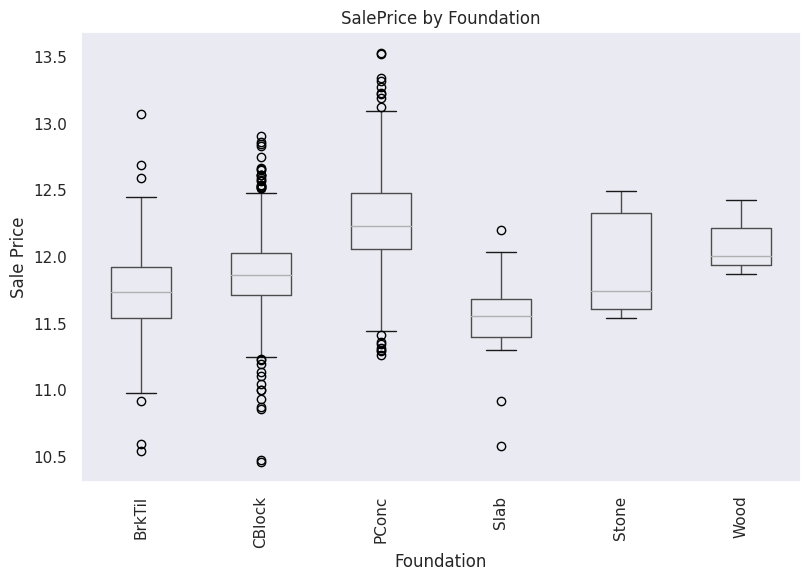

In [267]:
for index in chosed_discrete_index:
    df = train_data[[index,'SalePrice']]
    df.boxplot(column='SalePrice', by=index, grid=False)
    plt.title('SalePrice by '+index)
    plt.suptitle('')
    plt.xlabel(index)
    plt.ylabel('Sale Price')

    plt.xticks(rotation=90)
    plt.show()

In [268]:
# 标准化
def z_score_normalize(data, mean_val = np.array([None]), std_val = np.array([None])):
    if not (mean_val==None).any()==None or not (std_val==None).any():
        mean_val = np.nanmean(data, axis=0)
        std_val = np.nanstd(data, axis=0)
    normalized_data = (data - mean_val) / std_val
    return normalized_data, mean_val, std_val

def zero_ones_normalize(data, d_max = None, d_min = None):
    d_max = np.array(d_max)
    d_min = np.array(d_min)
    if not (d_max==None).any()==None or not (d_min==None).any():
        d_max = np.max(data, axis=0)
        d_min = np.min(data, axis=0)
    normalized_data = (data - d_min) / (d_max - d_min)
    return normalized_data, d_max, d_min

def encode_by_saleprice(df, column_name, target_column='SalePrice'):
    mean_values = df.groupby(column_name)[target_column].mean()
    sorted_categories = mean_values.sort_values().index
    category_mapping = {category: rank for rank, category in enumerate(sorted_categories)}
    df[column_name + '_encoded'] = df[column_name].map(category_mapping)
    
    return df, category_mapping

def encode_by_frequency(df, column_name):
    freq_values = df[column_name].value_counts()
    sorted_categories = freq_values.index
    category_mapping = {category: rank for rank, category in enumerate(sorted_categories)}
    df[column_name + '_encoded'] = df[column_name].map(category_mapping)
    
    return df, category_mapping

In [269]:
dealed_continue_train_xdata, OLS_mean, OLS_std = z_score_normalize(OLS_train_xdata[chosed_continue_index])
dealed_continue_test_xdata, _, _ = z_score_normalize(OLS_test_xdata[chosed_continue_index], OLS_mean, OLS_std)

In [270]:
temp = OLS_train_xdata[chosed_discrete_index].copy()
temp.loc[:,'SalePrice'] = OLS_train_ydata
temp, map_N = encode_by_saleprice(temp, 'Neighborhood')
temp, map_E = encode_by_saleprice(temp, 'ExterQual')
temp, map_K = encode_by_saleprice(temp, 'KitchenQual')
temp, map_B = encode_by_saleprice(temp, 'BsmtQual')
temp, map_G = encode_by_frequency(temp, 'GarageFinish')
temp, map_F = encode_by_frequency(temp, 'Foundation')
dealed_discrete_train_xdata = temp[chosed_discrete_index + '_encoded']
dealed_discrete_train_xdata.columns = chosed_discrete_index

temp = OLS_test_xdata[chosed_discrete_index].copy()
maps = {
    'map_N': map_N,
    'map_E': map_E,
    'map_K': map_K,
    'map_B': map_B,
    'map_G': map_G,
    'map_F': map_F
}
for i, (column, mapping) in enumerate(maps.items()):
    temp[column] = temp[chosed_discrete_index[i]].map(mapping)
dealed_discrete_test_xdata = temp[maps.keys()]
dealed_discrete_test_xdata.columns = chosed_discrete_index

In [271]:
dealed_OLS_train_xdata = pd.concat([dealed_continue_train_xdata,dealed_discrete_train_xdata],axis=1)
dealed_OLS_test_xdata = pd.concat([dealed_continue_test_xdata,dealed_discrete_test_xdata],axis=1)
dealed_OLS_train_xdata['SalePrice'] = OLS_train_ydata

# 人工变量
p1 = dealed_OLS_train_xdata['SalePrice'].quantile(0.1)
p2 = dealed_OLS_train_xdata['SalePrice'].quantile(0.2)
p3 = dealed_OLS_train_xdata['SalePrice'].quantile(0.4)
p4 = dealed_OLS_train_xdata['SalePrice'].quantile(0.6)
p5 = dealed_OLS_train_xdata['SalePrice'].quantile(0.8)
p6 = dealed_OLS_train_xdata['SalePrice'].quantile(0.9)
sign = {}
for index in dealed_OLS_train_xdata.index:
    temp = dealed_OLS_train_xdata['SalePrice'].loc[index]
    if temp < p1:
        sign[index] = -27
    elif temp < p2:
        sign[index] = -8
    elif temp < p3:
        sign[index] = -1
    elif temp < p4:
        sign[index] = 0
    elif temp < p5:
        sign[index] = 1
    elif temp < p6:
        sign[index] = 32
    elif temp >= p6:
        sign[index] = 243
dealed_OLS_train_xdata['Sign'],Sign_max,Sign_min = zero_ones_normalize(pd.DataFrame(sign,index=['Sign']).T)
dealed_OLS_train_xdata['Neighborhood'],Neighbor_max,Neighbor_min = zero_ones_normalize(dealed_OLS_train_xdata['Neighborhood'])

dealed_OLS_train_xdata

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,Neighborhood,ExterQual,KitchenQual,BsmtQual,GarageFinish,Foundation,SalePrice,Sign
0,0.651479,0.529194,0.311725,0.351000,0.002513,-0.803645,0.789741,0.912210,1.050994,0.878668,0.625000,2,2,3,1,0,12.247699,0.103704
1,-0.071836,-0.381965,0.311725,-0.060731,0.341114,0.418479,0.789741,-0.318683,0.156734,-0.429577,0.833333,1,1,3,1,1,12.109016,0.103704
2,0.651479,0.659631,0.311725,0.631726,0.065397,-0.576677,0.789741,-0.318683,0.984752,0.830215,0.625000,2,2,3,1,0,12.317171,0.103704
3,0.651479,0.541448,1.650307,0.790804,-0.105819,-0.439421,-1.026041,0.296763,-1.863632,-0.720298,0.708333,1,2,2,0,2,11.849405,0.096296
4,1.374795,1.282295,1.650307,1.698485,0.256237,0.112127,0.789741,1.527656,0.951632,0.733308,1.000000,2,2,3,1,0,12.429220,0.218519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.416598,0.311725,-0.060731,0.096134,-0.465737,0.789741,0.296763,0.918511,0.733308,0.583333,1,1,3,1,0,12.072547,0.100000
1456,-0.071836,1.106648,0.311725,0.126420,0.515947,1.981524,0.789741,0.296763,0.222975,0.151865,0.541667,1,1,3,0,1,12.254868,0.103704
1457,0.651479,1.470102,-1.026858,-1.033914,0.261554,0.228208,0.789741,1.527656,-1.002492,1.024029,0.708333,3,2,2,1,4,12.493133,0.218519
1458,-0.795151,-0.854536,-1.026858,-1.090059,0.203637,-0.077721,-1.026041,-0.934130,-0.704406,0.539493,0.416667,1,2,2,0,1,11.864469,0.096296


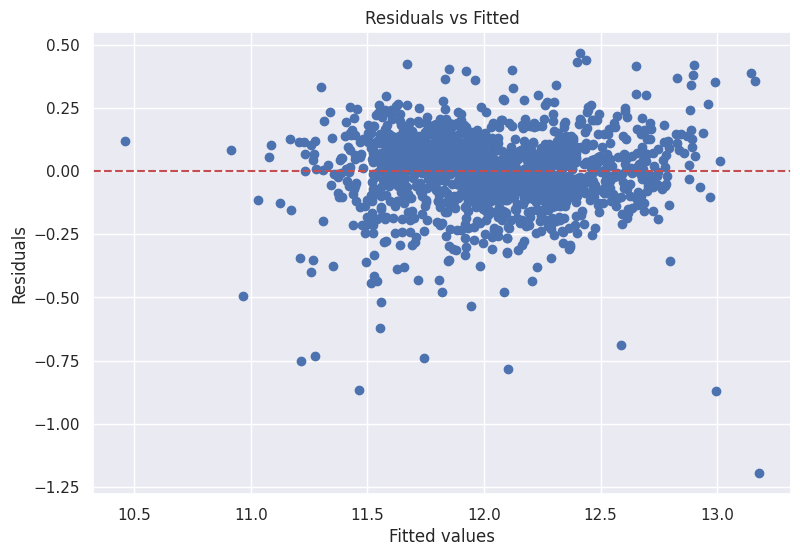

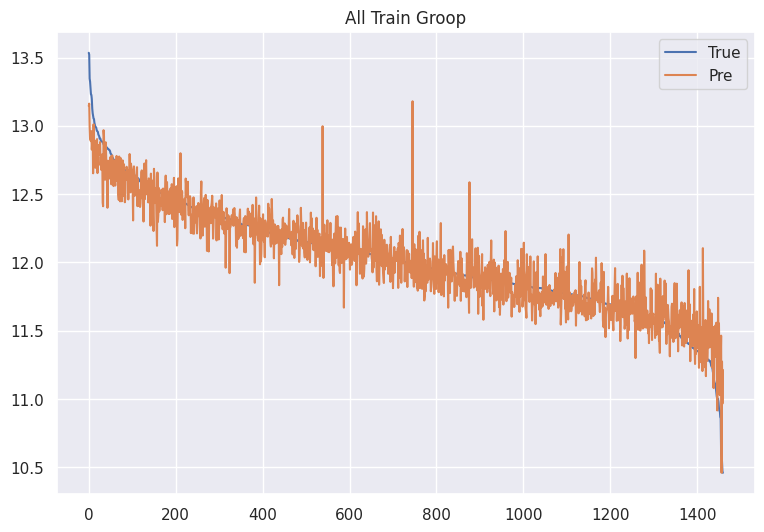

Train MSE: 0.02247022808073317 Train MAE: 0.10757950945810889


In [272]:
X = dealed_OLS_train_xdata[dealed_OLS_train_xdata.columns.drop(['SalePrice']).drop(['Sign'])]
X = sm.add_constant(X)
y = dealed_OLS_train_xdata['SalePrice']
model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
y_pre = results.predict(X)
# 绘制残差图
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

df = pd.DataFrame({'train_target':y,'y_pred_train':y_pre}).sort_values(by='train_target',ascending=False)
df['res'] = df['train_target'] - df['y_pred_train']
plt.figure()
plt.plot(range(len(df['train_target'])),df['train_target'],label = 'True')
plt.plot(range(len(df['y_pred_train'])),df['y_pred_train'],label = 'Pre')
plt.title("All Train Groop")
plt.legend(loc='upper right')
plt.show()
print('Train MSE:',np.mean(df['res']**2),'Train MAE:',np.mean(np.abs(df['res'])))

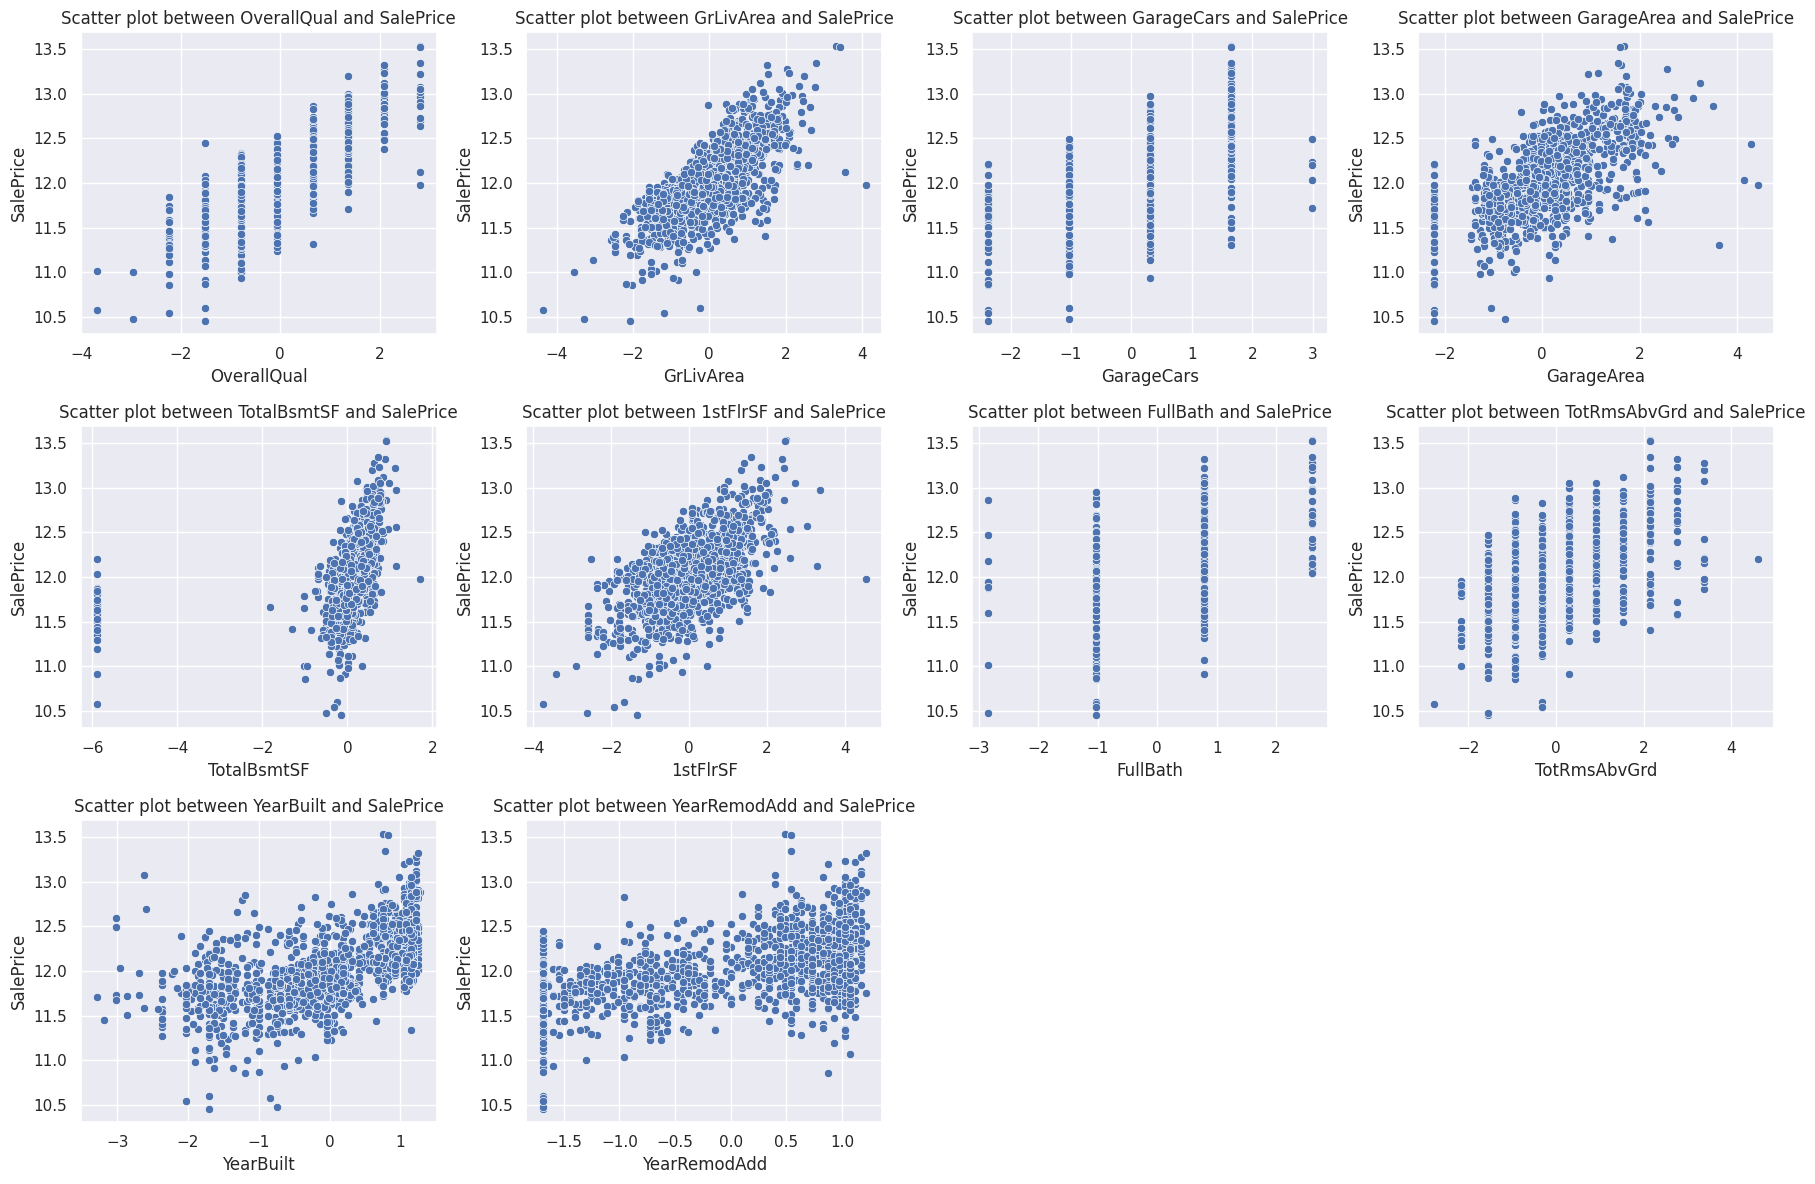

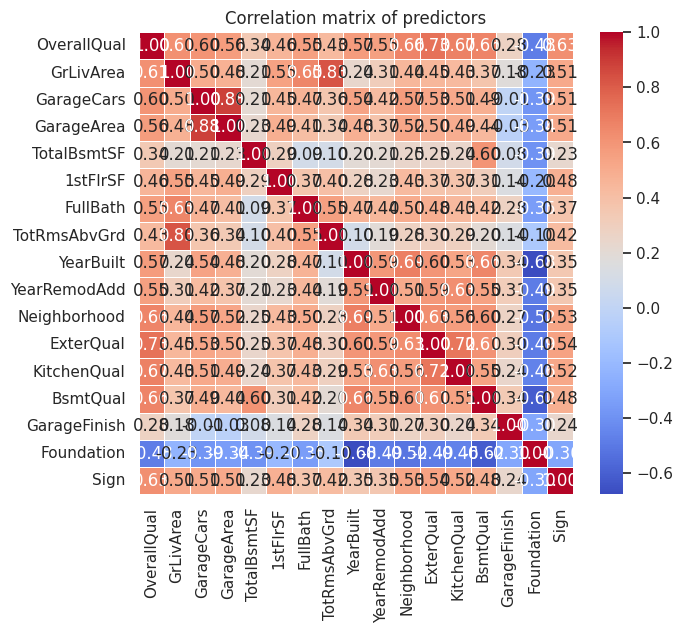

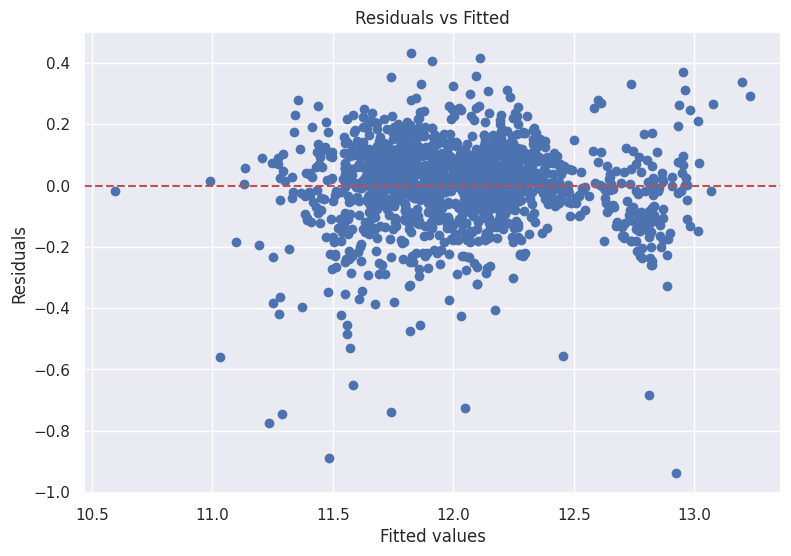

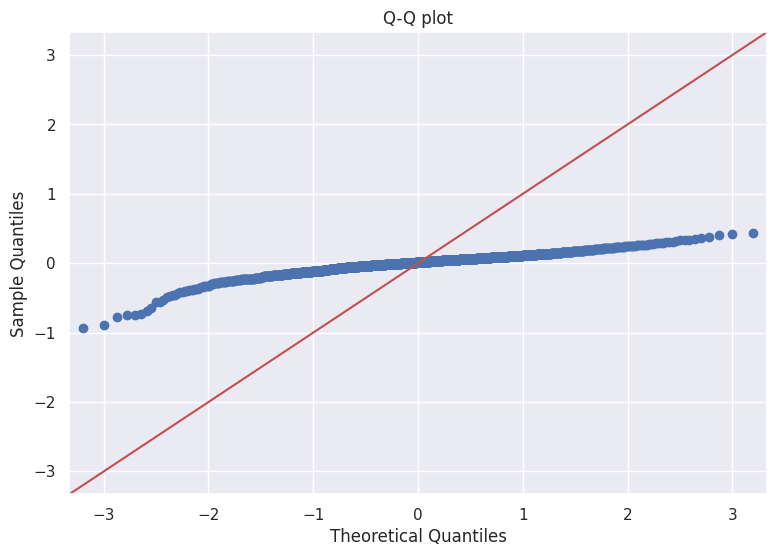

Shapiro-Wilk test p-value: 1.5920535981346879e-26
        Variable        VIF
0          const  63.084423
1    OverallQual   3.722555
2      GrLivArea   5.237159
3     GarageCars   5.387072
4     GarageArea   4.937736
5    TotalBsmtSF   2.122068
6       1stFlrSF   1.796012
7       FullBath   2.320528
8   TotRmsAbvGrd   3.435589
9      YearBuilt   3.882409
10  YearRemodAdd   2.077599
11  Neighborhood   2.680824
12     ExterQual   2.965691
13   KitchenQual   2.624283
14      BsmtQual   3.949158
15  GarageFinish   1.437348
16    Foundation   2.220107
17          Sign   2.118837


In [273]:
plt.figure(figsize=(18,12))
for i,col in enumerate(chosed_continue_index):
    temp = np.ceil(len(chosed_continue_index)/4)
    plt.subplot(int(temp),4,i+1)
    sns.scatterplot(x=dealed_OLS_train_xdata[col], y=dealed_OLS_train_xdata['SalePrice'])
    plt.title(f'Scatter plot between {col} and SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,6))
corr_matrix = dealed_OLS_train_xdata[dealed_OLS_train_xdata.columns.drop(['SalePrice'])].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation matrix of predictors')
plt.show()

X = dealed_OLS_train_xdata[dealed_OLS_train_xdata.columns.drop(['SalePrice'])]
X = sm.add_constant(X)
y = dealed_OLS_train_xdata['SalePrice']
model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid

# 绘制残差图
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# 绘制 Q-Q 图
sm.qqplot(residuals, line ='45')
plt.title('Q-Q plot')
plt.show()

# Shapiro-Wilk 正态性检验
stat, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {p_value}")

# VIF 多重共线性检验
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# 异常值筛选与处理
# Cook Distance
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(results)
cook_distance = influence.cooks_distance[0]
index1 = cook_distance[cook_distance>4/len(cook_distance)].index

# DFFITS
dffits = influence.dffits[0]
index2 = dffits[np.abs(dffits)>(2*np.sqrt(17/len(dffits)))].index

abnormal_index = set(index1.append(index2))

dealed_OLS_train_xdata.drop(abnormal_index,axis=0,inplace=True)
dealed_OLS_train_xdata.reset_index(drop=True,inplace=True)

In [274]:
#dealed_OLS_train_xdata  # 训练集
#dealed_OLS_test_xdata   # 测试集
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(dealed_OLS_train_xdata.drop(['SalePrice'],axis=1),
                                                               dealed_OLS_train_xdata['SalePrice'],
                                                               test_size = 0.2,random_state = 42)
continue_train_data_index = train_data.dtypes[train_data.dtypes != "object"].index
discrete_train_data_index = train_data.dtypes[train_data.dtypes == "object"].index

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089 entries, 1291 to 1126
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1089 non-null   float64
 1   GrLivArea     1089 non-null   float64
 2   GarageCars    1089 non-null   float64
 3   GarageArea    1089 non-null   float64
 4   TotalBsmtSF   1089 non-null   float64
 5   1stFlrSF      1089 non-null   float64
 6   FullBath      1089 non-null   float64
 7   TotRmsAbvGrd  1089 non-null   float64
 8   YearBuilt     1089 non-null   float64
 9   YearRemodAdd  1089 non-null   float64
 10  Neighborhood  1089 non-null   float64
 11  ExterQual     1089 non-null   int64  
 12  KitchenQual   1089 non-null   int64  
 13  BsmtQual      1089 non-null   int64  
 14  GarageFinish  1089 non-null   int64  
 15  Foundation    1089 non-null   int64  
 16  Sign          1089 non-null   float64
dtypes: float64(12), int64(5)
memory usage: 153.1 KB


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     802.5
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:06:40   Log-Likelihood:                 974.62
No. Observations:                1089   AIC:                            -1913.
Df Residuals:                    1071   BIC:                            -1823.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.8563      0.025    477.493   

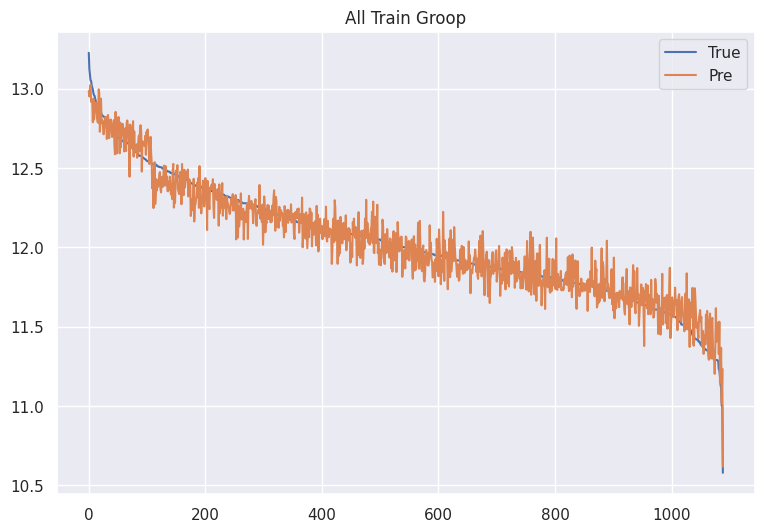

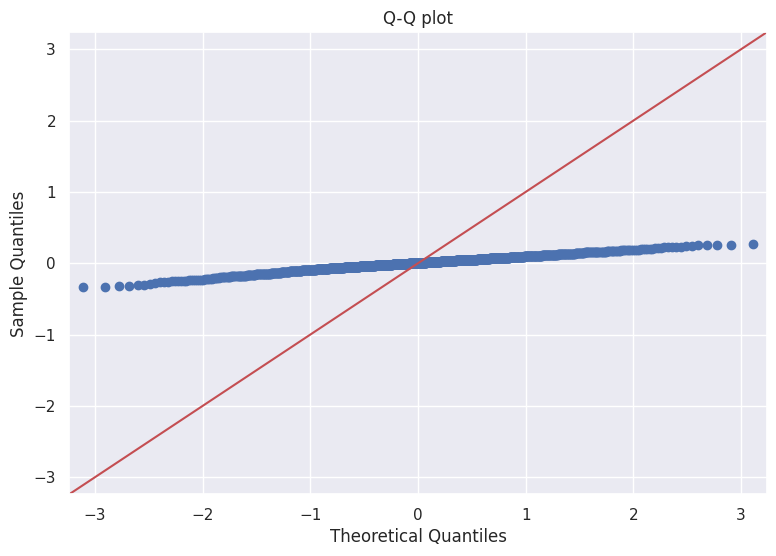

Shapiro-Wilk test p-value: 5.6701464810241794e-05
Train MSE: 0.00977613162713632 Train MAE: 0.0771534464826938


In [275]:
X = sm.add_constant(train_data)
model = sm.OLS(train_target, X)
results = model.fit()
y_pred_train = results.predict(X)
print(results.summary())
df = pd.DataFrame({'train_target':train_target,'y_pred_train':y_pred_train}).sort_values(by='train_target',ascending=False)
df['res'] = df['train_target'] - df['y_pred_train']
plt.figure()
plt.plot(range(len(train_target)),df['train_target'],label = 'True')
plt.plot(range(len(y_pred_train)),df['y_pred_train'],label = 'Pre')
plt.title("All Train Groop")
plt.legend(loc='upper right')
plt.show()

sm.qqplot(df['res'], line ='45')
plt.title('Q-Q plot')
plt.show()

stat, p_value = stats.shapiro(df['res'])
print(f"Shapiro-Wilk test p-value: {p_value}")
print('Train MSE:',np.mean(df['res']**2),'Train MAE:',np.mean(np.abs(df['res'])))

# 逐步回归确定自变量
略

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1456.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:06:41   Log-Likelihood:                 891.23
No. Observations:                1089   AIC:                            -1764.
Df Residuals:                    1080   BIC:                            -1720.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.6398      0.017    678.728   

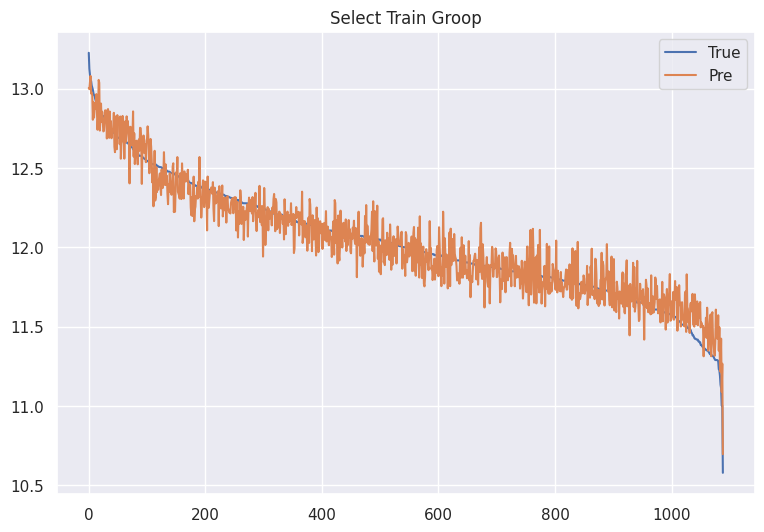

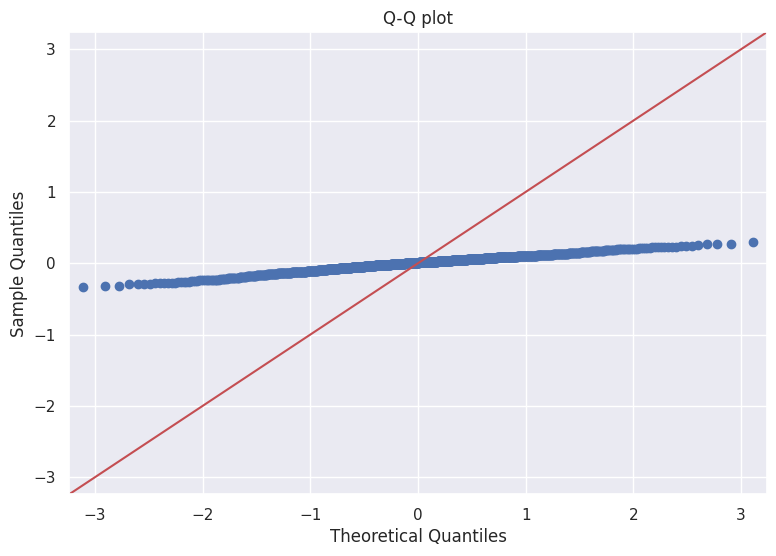

Shapiro-Wilk test p-value: 9.272237641711497e-06


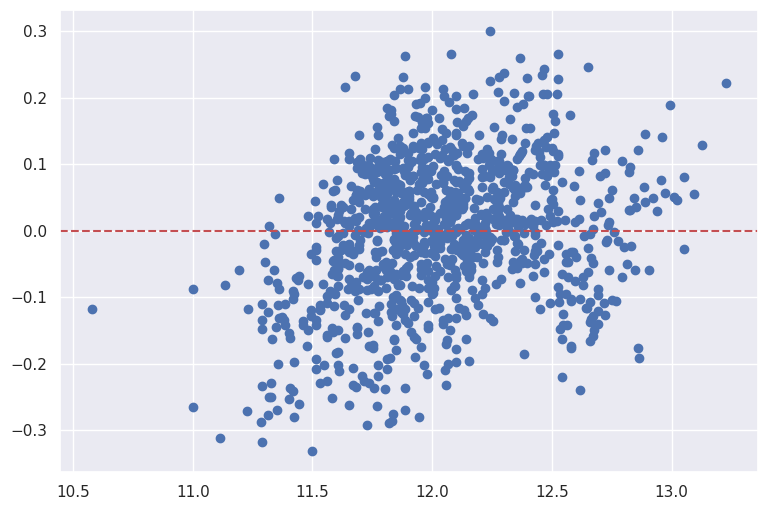

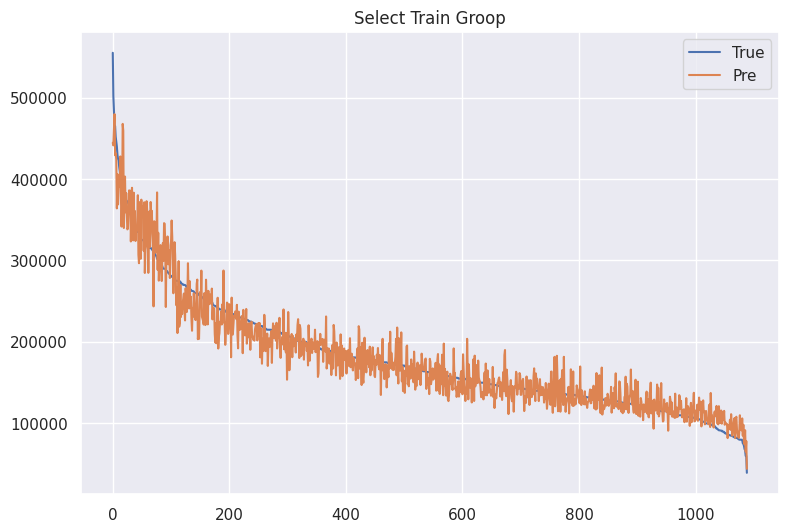

Train MSE: 0.011394007068209954 Train MAE: 0.0842348280861256


In [276]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_goldfeldquandt

train_data = train_data[['OverallQual','Sign','1stFlrSF','GrLivArea','Neighborhood','GarageArea','KitchenQual','BsmtQual']]
X = sm.add_constant(train_data)
model = sm.OLS(train_target, X)
results = model.fit()
y_pred_train = results.predict(X)
print(results.summary())
bp_test = het_breuschpagan(results.resid, results.model.exog)
white_test = het_white(results.resid, results.model.exog)
gq_test = het_goldfeldquandt(results.resid, results.model.exog)

print('BP:',bp_test[1],'White:',white_test[1],'GP:',gq_test[1])

df = pd.DataFrame({'train_target':train_target,'y_pred_train':y_pred_train}).sort_values(by='train_target',ascending=False)
df['res'] = df['train_target'] - df['y_pred_train']

plt.figure()
plt.plot(range(len(train_target)),df['train_target'],label = 'True')
plt.plot(range(len(y_pred_train)),df['y_pred_train'],label = 'Pre')
plt.title("Select Train Groop")
plt.legend(loc='upper right')
plt.show()

sm.qqplot(df['res'], line ='45')
plt.title('Q-Q plot')
plt.show()

stat, p_value = stats.shapiro(df['res'])
print(f"Shapiro-Wilk test p-value: {p_value}")

plt.scatter(df['train_target'],df['res'])
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

plt.figure()
plt.plot(range(len(train_target)),np.exp(df['train_target']),label = 'True')
plt.plot(range(len(y_pred_train)),np.exp(df['y_pred_train']),label = 'Pre')
plt.title("Select Train Groop")
plt.legend(loc='upper right')
plt.show()
print('Train MSE:',np.mean(df['res']**2),'Train MAE:',np.mean(np.abs(df['res'])))

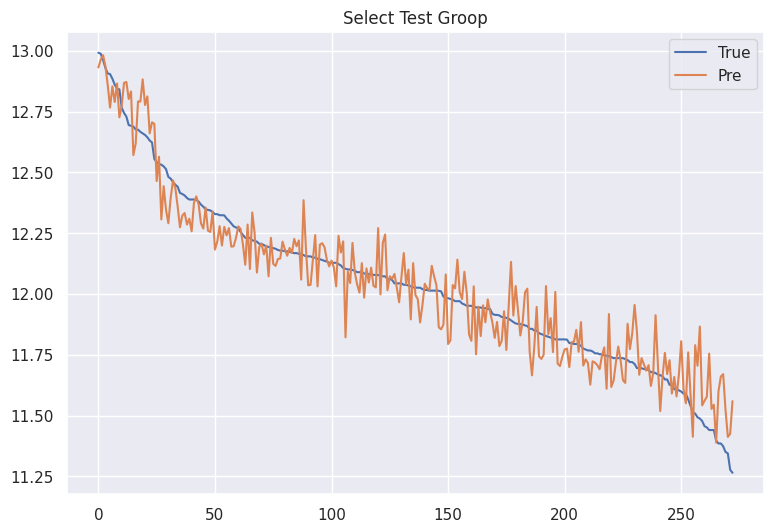

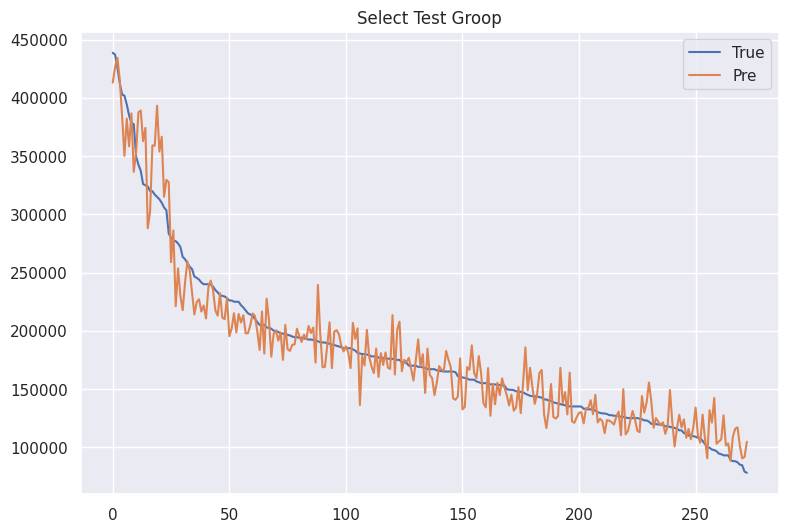

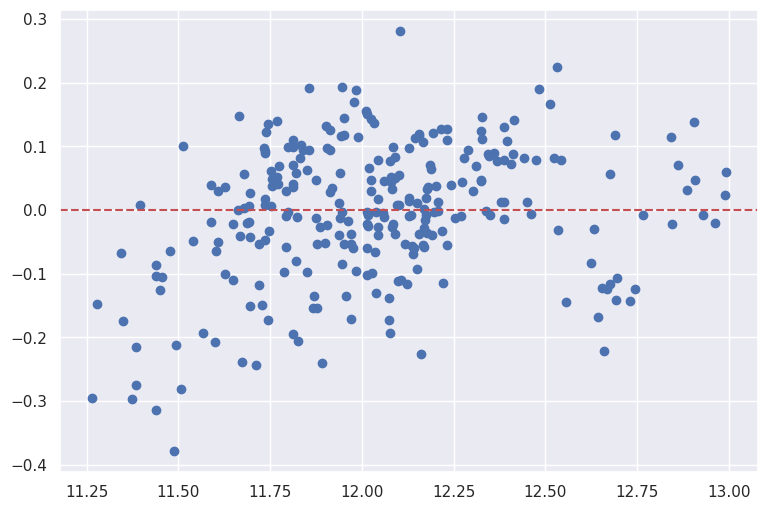

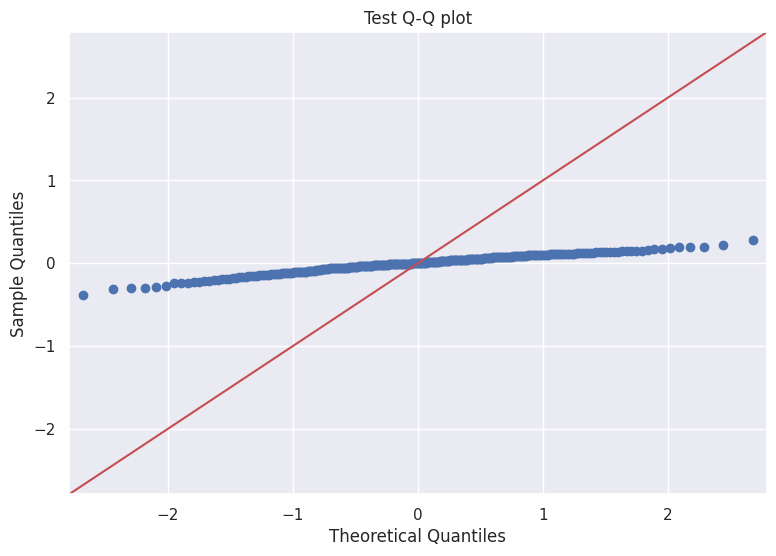

Shapiro-Wilk test p-value: 0.0002678063618408475
Test MSE: 0.011430057212729595 Test MAE: 0.08312938317084013


In [277]:
test_data = test_data[['OverallQual','Sign','1stFlrSF','GrLivArea','Neighborhood','GarageArea','KitchenQual','BsmtQual']]
X_test = sm.add_constant(test_data)
y_pred_test = results.predict(X_test)
df = pd.DataFrame({'test_target':test_target,'y_pred_test':y_pred_test}).sort_values(by='test_target',ascending=False)

df['res'] = df['test_target'] - df['y_pred_test']
plt.figure()
plt.plot(range(len(df['test_target'])),df['test_target'],label = 'True')
plt.plot(range(len(df['y_pred_test'])),df['y_pred_test'],label = 'Pre')
plt.title("Select Test Groop")
plt.legend(loc='upper right')
plt.show()
plt.figure()
plt.plot(range(len(df['test_target'])),np.exp(df['test_target']),label = 'True')
plt.plot(range(len(df['y_pred_test'])),np.exp(df['y_pred_test']),label = 'Pre')
plt.title("Select Test Groop")
plt.legend(loc='upper right')
plt.show()
plt.scatter(df['test_target'],df['res'])
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
sm.qqplot(df['res'], line ='45')
plt.title('Test Q-Q plot')
plt.show()

stat, p_value = stats.shapiro(df['res'])
print(f"Shapiro-Wilk test p-value: {p_value}")
print('Test MSE:',np.mean(df['res']**2),'Test MAE:',np.mean(np.abs(df['res'])))

# 根据stata分析添加高次项进行OLS回归


In [278]:
dealed_OLS_train_xdata['Neighborhood_2'] = (dealed_OLS_train_xdata['Neighborhood'] - np.mean(dealed_OLS_train_xdata['Neighborhood']))**2
dealed_OLS_train_xdata['1stFlrSF_3'] = (dealed_OLS_train_xdata['1stFlrSF'] - np.mean(dealed_OLS_train_xdata['1stFlrSF']))**3
dealed_OLS_train_xdata['Neighborhood_3'] = (dealed_OLS_train_xdata['Neighborhood'] - np.mean(dealed_OLS_train_xdata['Neighborhood']))**3
dealed_OLS_train_xdata['Sign_2'] = (dealed_OLS_train_xdata['Sign'] - np.mean(dealed_OLS_train_xdata['Sign']))**2
dealed_OLS_train_xdata['Sign_3'] = (dealed_OLS_train_xdata['Sign'] - np.mean(dealed_OLS_train_xdata['Sign']))**3
dealed_OLS_train_xdata['Sign_pca'] = (dealed_OLS_train_xdata['Sign']+dealed_OLS_train_xdata['Sign_2']+dealed_OLS_train_xdata['Sign_3'])/2
dealed_OLS_train_xdata = dealed_OLS_train_xdata[['OverallQual','Sign','1stFlrSF','GrLivArea','Neighborhood','GarageArea','KitchenQual',
                                                 'BsmtQual','Neighborhood_2','1stFlrSF_3','Neighborhood_3','Sign_pca','SalePrice']]

dealed_OLS_test_xdata['Neighborhood'],_,_ = zero_ones_normalize(dealed_OLS_test_xdata['Neighborhood'],Neighbor_max,Neighbor_min)
dealed_OLS_test_xdata['Neighborhood_2'] = (dealed_OLS_test_xdata['Neighborhood'] - np.mean(dealed_OLS_train_xdata['Neighborhood']))**2
dealed_OLS_test_xdata['1stFlrSF_3'] = (dealed_OLS_test_xdata['1stFlrSF'] - np.mean(dealed_OLS_train_xdata['1stFlrSF']))**3
dealed_OLS_test_xdata['Neighborhood_3'] = (dealed_OLS_test_xdata['Neighborhood'] - np.mean(dealed_OLS_train_xdata['Neighborhood']))**3
dealed_OLS_test_xdata = dealed_OLS_test_xdata[['OverallQual','1stFlrSF','GrLivArea','Neighborhood','GarageArea','KitchenQual',
                                                 'BsmtQual','Neighborhood_2','1stFlrSF_3','Neighborhood_3']]
train_data,test_data,train_target,test_target=train_test_split(dealed_OLS_train_xdata.drop(['SalePrice'],axis=1),
                                                               dealed_OLS_train_xdata['SalePrice'],
                                                               test_size = 0.2,random_state = 42)
continue_train_data_index = train_data.dtypes[train_data.dtypes != "object"].index
discrete_train_data_index = train_data.dtypes[train_data.dtypes == "object"].index
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089 entries, 1291 to 1126
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OverallQual     1089 non-null   float64
 1   Sign            1089 non-null   float64
 2   1stFlrSF        1089 non-null   float64
 3   GrLivArea       1089 non-null   float64
 4   Neighborhood    1089 non-null   float64
 5   GarageArea      1089 non-null   float64
 6   KitchenQual     1089 non-null   int64  
 7   BsmtQual        1089 non-null   int64  
 8   Neighborhood_2  1089 non-null   float64
 9   1stFlrSF_3      1089 non-null   float64
 10  Neighborhood_3  1089 non-null   float64
 11  Sign_pca        1089 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 110.6 KB


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1472.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:06:43   Log-Likelihood:                 1103.8
No. Observations:                1089   AIC:                            -2182.
Df Residuals:                    1076   BIC:                            -2117.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5249      0.018    637.

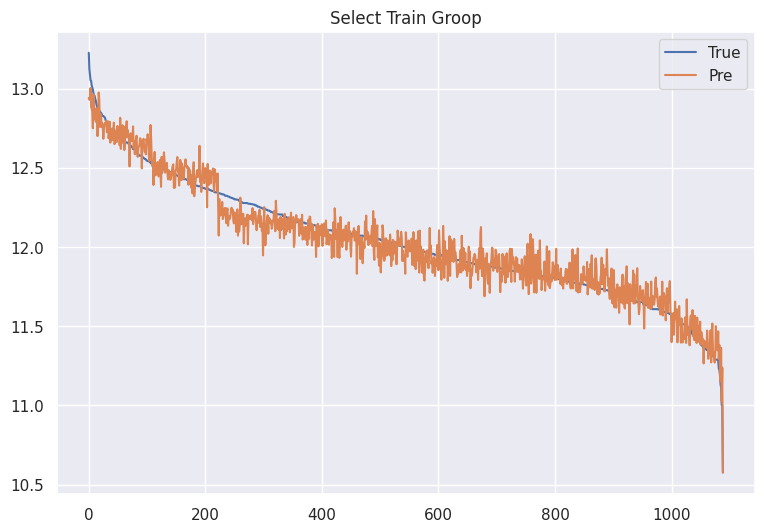

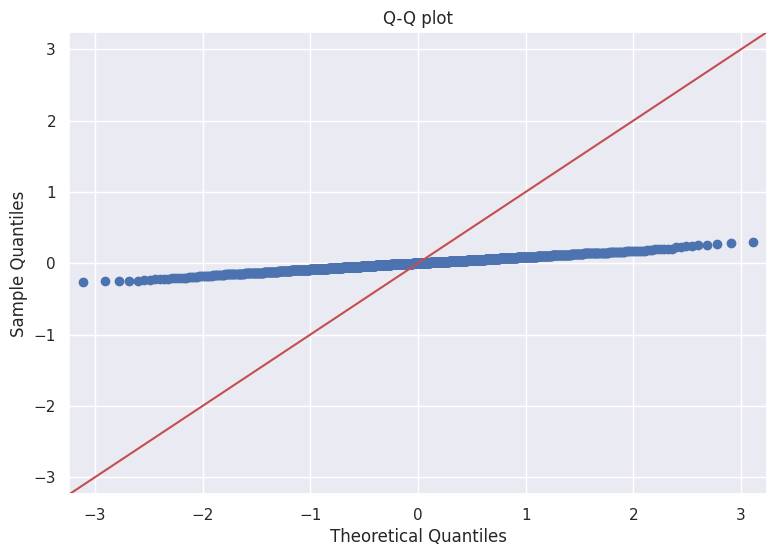

Shapiro-Wilk test p-value: 0.3954994078332014


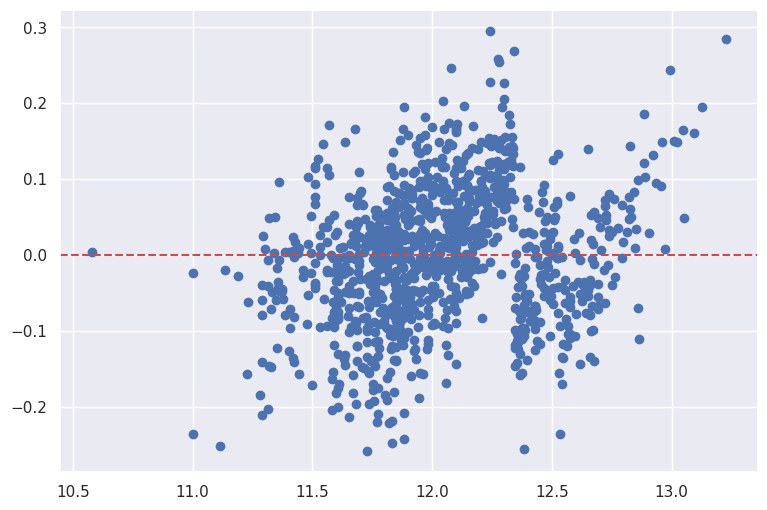

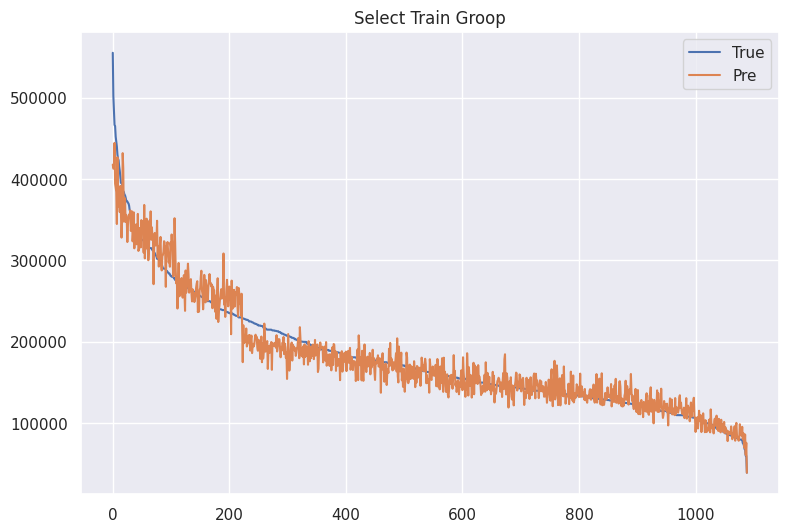

Train MSE: 0.0077110914619915065 Train MAE: 0.06920051932480867


In [279]:
X = sm.add_constant(train_data)
model = sm.OLS(train_target, X)
results = model.fit()
y_pred_train = results.predict(X)
print(results.summary())
bp_test = het_breuschpagan(results.resid, results.model.exog)
white_test = het_white(results.resid, results.model.exog)
gq_test = het_goldfeldquandt(results.resid, results.model.exog)

print('BP:',bp_test[1],'White:',white_test[1],'GP:',gq_test[1])

df = pd.DataFrame({'train_target':train_target,'y_pred_train':y_pred_train}).sort_values(by='train_target',ascending=False)
df['res'] = df['train_target'] - df['y_pred_train']

plt.figure()
plt.plot(range(len(train_target)),df['train_target'],label = 'True')
plt.plot(range(len(y_pred_train)),df['y_pred_train'],label = 'Pre')
plt.title("Select Train Groop")
plt.legend(loc='upper right')
plt.show()

sm.qqplot(df['res'], line ='45')
plt.title('Q-Q plot')
plt.show()

stat, p_value = stats.shapiro(df['res'])
print(f"Shapiro-Wilk test p-value: {p_value}")

plt.scatter(df['train_target'],df['res'])
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

plt.figure()
plt.plot(range(len(train_target)),np.exp(df['train_target']),label = 'True')
plt.plot(range(len(y_pred_train)),np.exp(df['y_pred_train']),label = 'Pre')
plt.title("Select Train Groop")
plt.legend(loc='upper right')
plt.show()
print('Train MSE:',np.mean(df['res']**2),'Train MAE:',np.mean(np.abs(df['res'])))

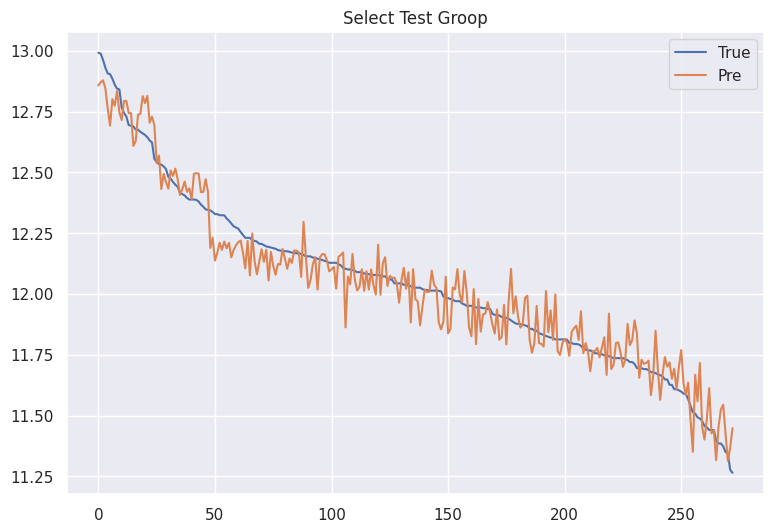

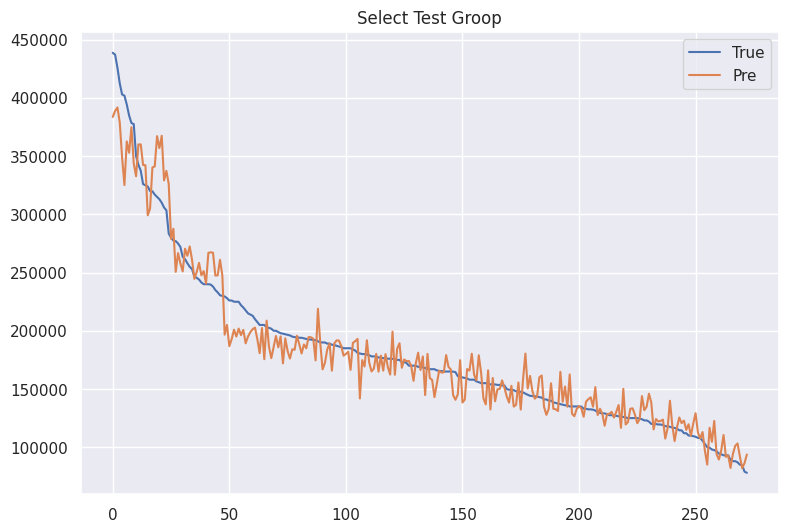

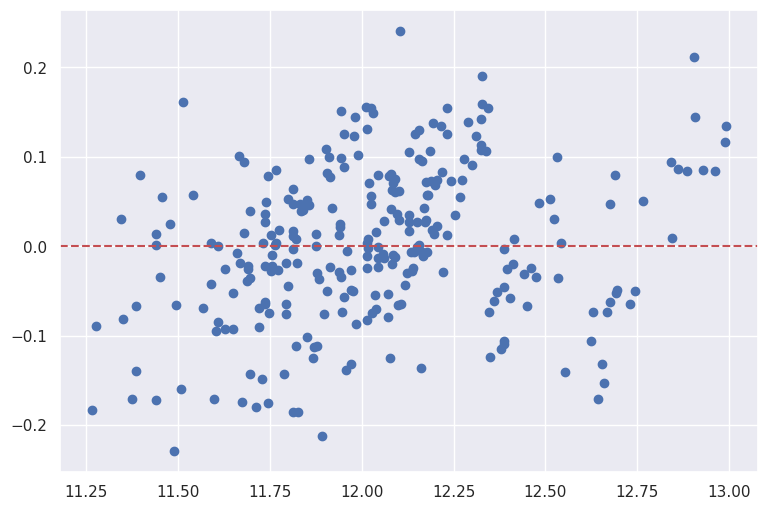

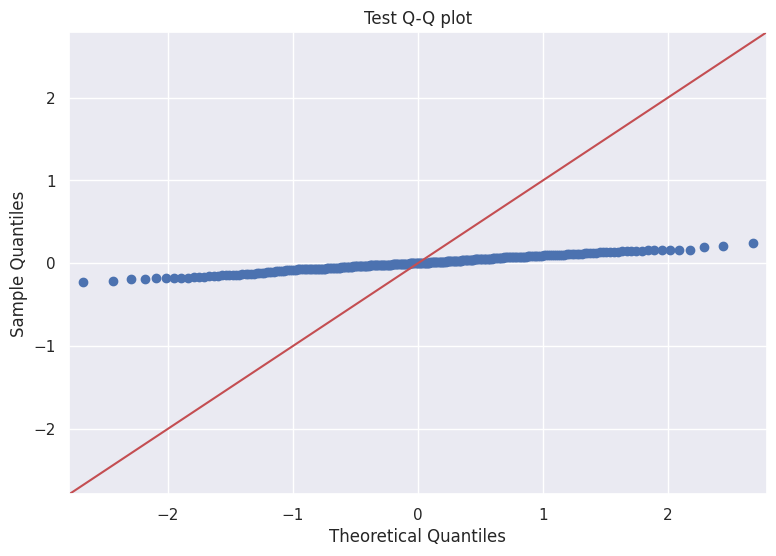

Shapiro-Wilk test p-value: 0.4278299659106291
Test MSE: 0.007462194653160692 Test MAE: 0.06920274817473596


In [280]:
X_test = sm.add_constant(test_data)
y_pred_test = results.predict(X_test)
df = pd.DataFrame({'test_target':test_target,'y_pred_test':y_pred_test}).sort_values(by='test_target',ascending=False)
df['res'] = df['test_target'] - df['y_pred_test']
plt.figure()
plt.plot(range(len(df['test_target'])),df['test_target'],label = 'True')
plt.plot(range(len(df['y_pred_test'])),df['y_pred_test'],label = 'Pre')
plt.title("Select Test Groop")
plt.legend(loc='upper right')
plt.show()
plt.figure()
plt.plot(range(len(df['test_target'])),np.exp(df['test_target']),label = 'True')
plt.plot(range(len(df['y_pred_test'])),np.exp(df['y_pred_test']),label = 'Pre')
plt.title("Select Test Groop")
plt.legend(loc='upper right')
plt.show()
plt.scatter(df['test_target'],df['res'])
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
sm.qqplot(df['res'], line ='45')
plt.title('Test Q-Q plot')
plt.show()

stat, p_value = stats.shapiro(df['res'])
print(f"Shapiro-Wilk test p-value: {p_value}")
print('Test MSE:',np.mean(df['res']**2),'Test MAE:',np.mean(np.abs(df['res'])))

Train Accuracy: 99.19%


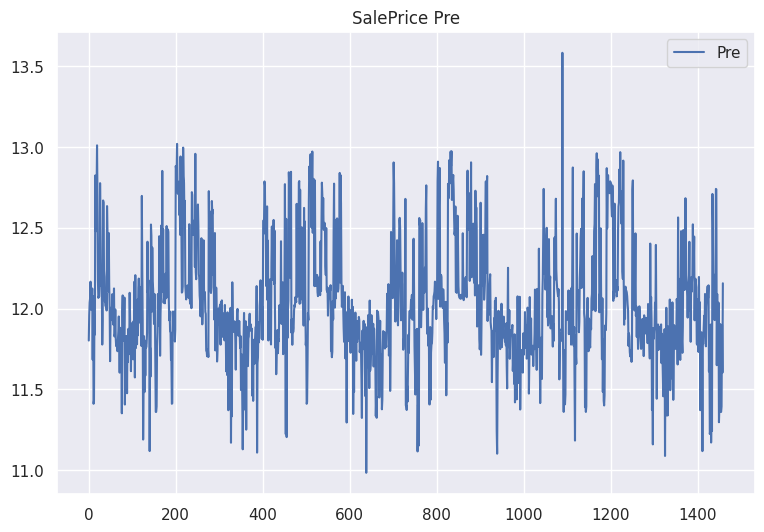

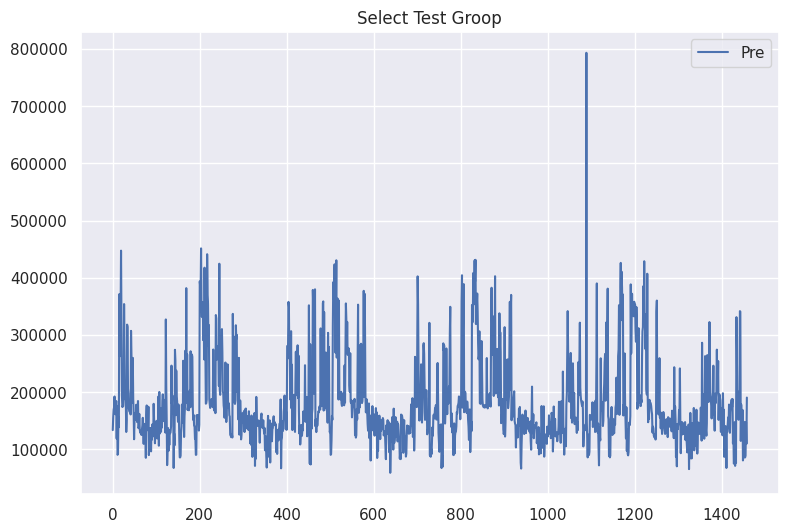

In [281]:
# 测试集
sign = {}
for index in dealed_OLS_train_xdata.index:
    temp = dealed_OLS_train_xdata['SalePrice'].loc[index]
    if temp < p1:
        sign[index] = -27
    elif temp < p2:
        sign[index] = -8
    elif temp < p3:
        sign[index] = -1
    elif temp < p4:
        sign[index] = 0
    elif temp < p5:
        sign[index] = 1
    elif temp < p6:
        sign[index] = 32
    elif temp >= p6:
        sign[index] = 243

X_train_Sign = dealed_OLS_train_xdata.drop(columns=['Sign_pca']).drop(columns=['SalePrice']).drop(columns=['Sign'])
y_train_Sign = pd.DataFrame(sign,index=['target_Sign']).T
X_test_Sign = dealed_OLS_test_xdata

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(X_train_Sign, y_train_Sign['target_Sign'])

y_train_pred = classifier.predict(X_train_Sign)
accuracy = accuracy_score(y_train_Sign['target_Sign'], y_train_pred)
print(f"Train Accuracy: {accuracy * 100:.2f}%")

y_pred = classifier.predict(X_test_Sign)

temp,_,_ = zero_ones_normalize(pd.DataFrame(y_pred.T,columns=['Sign_pre']),d_max=Sign_max,d_min=Sign_min)
X_test_Sign['Sign'] = temp
X_test_Sign['Sign_pca'] = (temp + (temp-np.mean(dealed_OLS_train_xdata['Sign']))**2 + 
                           (temp - np.mean(dealed_OLS_train_xdata['Sign']))**3) / 2
X_test_Sign = X_test_Sign[['OverallQual','Sign','1stFlrSF','GrLivArea','Neighborhood','GarageArea','KitchenQual',
                                                 'BsmtQual','Neighborhood_2','1stFlrSF_3','Neighborhood_3','Sign_pca']]

X_test = sm.add_constant(X_test_Sign)
y_pred_test = results.predict(X_test)

df = pd.DataFrame({'SalePrice':y_pred_test})

plt.figure()
plt.plot(range(len(df['SalePrice'])),df['SalePrice'],label = 'Pre')
plt.title("SalePrice Pre")
plt.legend(loc='upper right')
plt.show()
plt.figure()
plt.plot(range(len(df['SalePrice'])),np.exp(df['SalePrice']),label = 'Pre')
plt.title("Select Test Groop")
plt.legend(loc='upper right')
plt.show()

In [282]:
# 输出结果
test_ydata = test_data = pd.read_csv(open('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv'),encoding='utf-8')
result = (np.exp(df['SalePrice'])+1)
result.index = test_ydata.index
result.to_csv('sample_submission.csv')